#**CSI5155 - Fall 2024**
#**Assignment 2 – Explainable AI (XAI)**

#**CHOCOLATE DATASET**

#**Importing The Dependencies**

In [1]:
import shap
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV, train_test_split, KFold
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.metrics import accuracy_score
import random


#**Load The Dataset**

In [2]:
file_path = '/content/chocolate_dataset.csv'
data = pd.read_csv(file_path)
X = data.iloc[:, :-1]
y = data['Choc'].apply(lambda x: 1 if x == 1 else 0)



#**Train-Test_Split**

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.34, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


#**Models**

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y, test_size=0.2, random_state=42)
param_grid_rf = {
    'n_estimators': [10, 50, 100],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10, 20, 40],
    'max_features': ['sqrt', 'log2']
}

param_grid_dt = {
    'max_depth': [3, 5, 10, 15, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 6],
    'criterion': ['gini', 'entropy']
}


model_rf = RandomForestClassifier(random_state=42)
grid_search_rf = RandomizedSearchCV(model_rf, param_grid_rf, n_iter=10, cv=5, random_state=42)
grid_search_rf.fit(X_train, y_train)


best_model_rf = grid_search_rf.best_estimator_
print("\nBest model parameters for Random Forest Learner:", best_model_rf.get_params())


test_accuracy_rf = accuracy_score(y_test, best_model_rf.predict(X_test))

print("Accuracy for Test Set (Best Random Forest Model):", test_accuracy_rf)


model_dt = DecisionTreeClassifier(random_state=42)
grid_search_dt = RandomizedSearchCV(model_dt, param_grid_dt, n_iter=10, cv=5, random_state=42)
grid_search_dt.fit(X_train, y_train)


best_model_dt = grid_search_dt.best_estimator_
print("\nBest model parameters for Decision Tree Learner:", best_model_dt.get_params())



test_accuracy_dt = accuracy_score(y_test, best_model_dt.predict(X_test))

print("Accuracy for Test Set (Best Decision Tree Model):", test_accuracy_dt)



Best model parameters for Random Forest Learner: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 20, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 20, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 50, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}
Accuracy for Test Set (Best Random Forest Model): 0.7294429708222812

Best model parameters for Decision Tree Learner: {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 6, 'min_samples_split': 10, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': 42, 'splitter': 'best'}
Accuracy for Test Set (Best Decision Tree Model): 0.7241379310344828


In [5]:
explainer_best = shap.TreeExplainer(best_model, X_train)
shap_values_best = explainer_best.shap_values(X_test)

explainer_worst = shap.TreeExplainer(worst_model, X_train)
shap_values_worst = explainer_worst.shap_values(X_test)
shap_values_best_class_1 = shap_values_best[:, :, 1]  # Selecting SHAP values for class 1
shap_values_worst_class_1 = shap_values_worst[:, :, 1]  # Selecting SHAP values for class 1
print("Shape of shap_values_best_class_1:", shap_values_best_class_1.shape)
print("Shape of shap_values_worst_class_1:", shap_values_worst_class_1.shape)
print("Shape of X_test:", X_test.shape)





Shape of shap_values_best_class_1: (641, 12)
Shape of shap_values_worst_class_1: (641, 12)
Shape of X_test: (641, 12)


In [79]:
print("\nSHAP values for best model, class 1 (first instance):")
print(shap_values_best_class_1[0])
print("\nSHAP values for worst model, class 1 (first instance):")
print(shap_values_worst_class_1[0])



SHAP values for best model, class 1 (first instance):
[-0.00261483  0.00407791  0.0044732  -0.00106645  0.00472458 -0.00490446
  0.00254152  0.00053945  0.00204584  0.00343849  0.00586209 -0.00210247]

SHAP values for worst model, class 1 (first instance):
[0.         0.         0.00133333 0.         0.00343075 0.
 0.0006     0.         0.00248923 0.00183333 0.         0.        ]


#**Summary Plot**

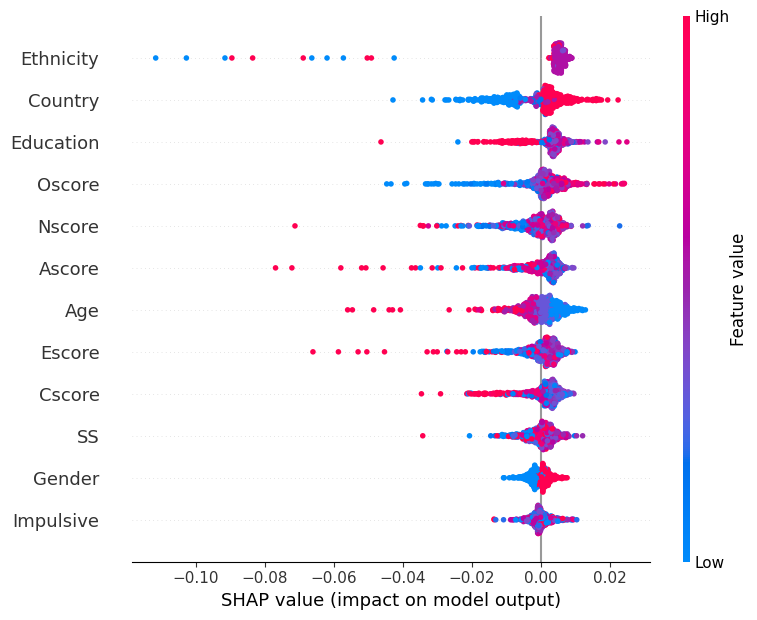

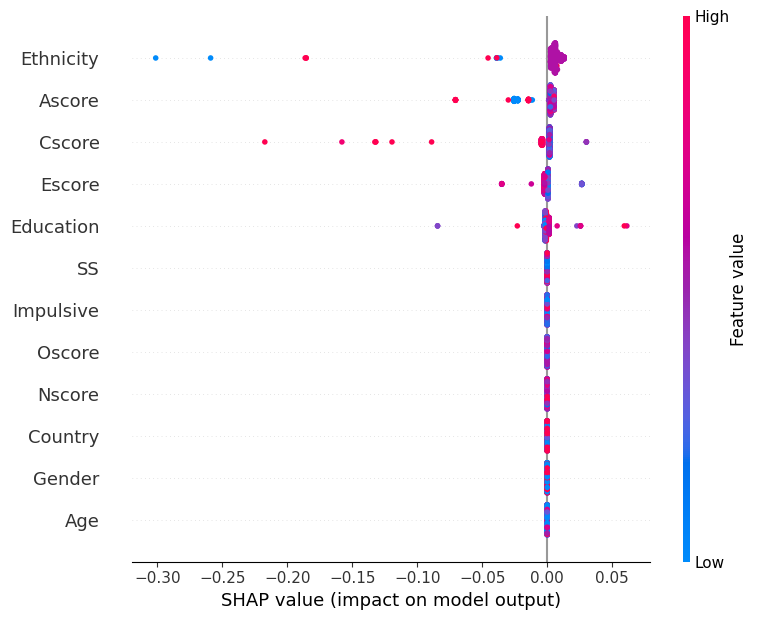

In [80]:
shap_values_best_class_1.shape == X_test.shape
shap.summary_plot(shap_values_best_class_1, X_test, plot_type="dot", feature_names=list(X.columns))


shap_values_worst_class_1.shape == X_test.shape
shap.summary_plot(shap_values_worst_class_1, X_test, plot_type="dot", feature_names=list(X.columns))


#**Force Plot**

In [85]:
from IPython.display import display


data_index = random.randint(0, X_test.shape[0] - 1)

# Force Plot for a single instance for the best model
shap.initjs()
force_plot_best = shap.force_plot(explainer_best.expected_value[1], shap_values_best_class_1[data_index], X_test[data_index], feature_names=list(X.columns))
display(force_plot_best)

# Force Plot for a single instance for the worst model
force_plot_worst = shap.force_plot(explainer_worst.expected_value[1], shap_values_worst_class_1[data_index], X_test[data_index], feature_names=list(X.columns))
display(force_plot_worst)


#**Waterfall Plot**

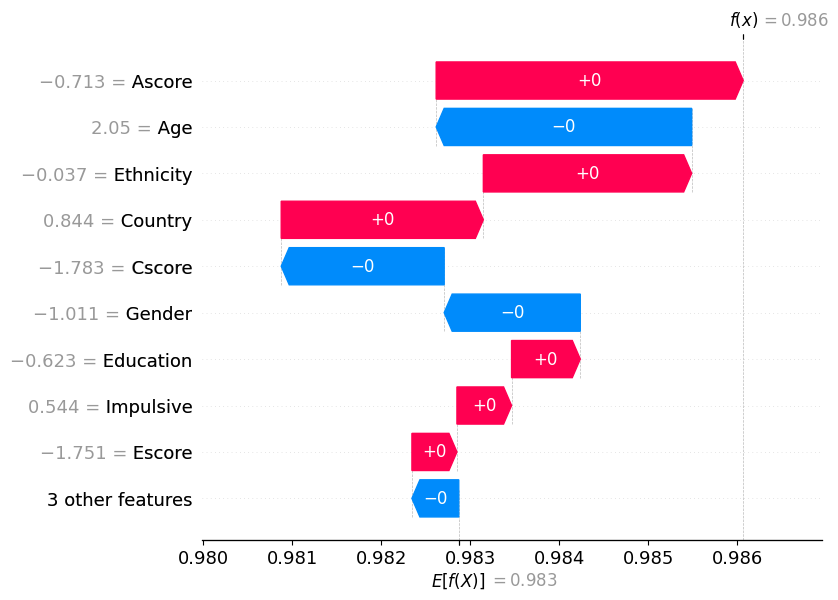

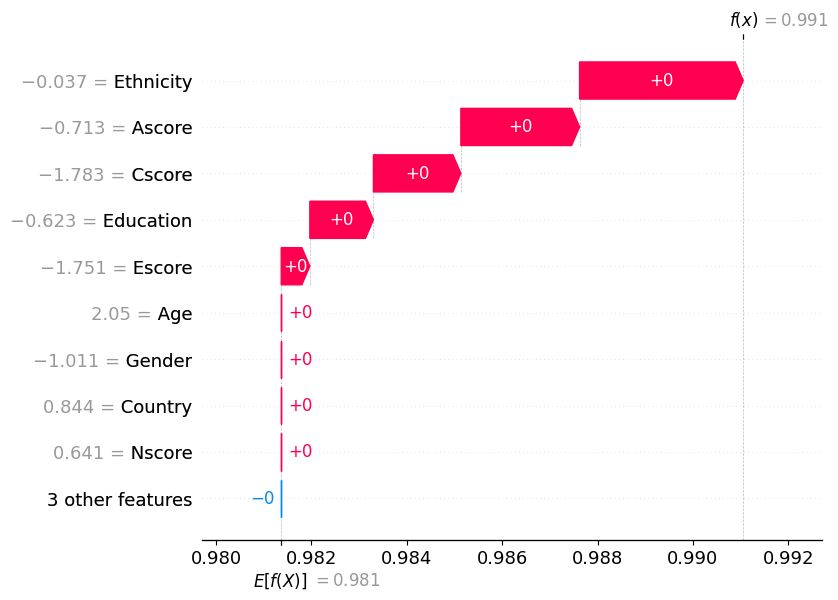

In [99]:
# Waterfall Plot for a single instance in the best model
shap.waterfall_plot(shap.Explanation(values=shap_values_best_class_1[data_index], base_values=explainer_best.expected_value[1], data=X_test[data_index], feature_names=list(X.columns)))

# Waterfall Plot for a single instance in the worst model
shap.waterfall_plot(shap.Explanation(values=shap_values_worst_class_1[data_index], base_values=explainer_worst.expected_value[1], data=X_test[data_index], feature_names=list(X.columns)))


#**Decision Plot**

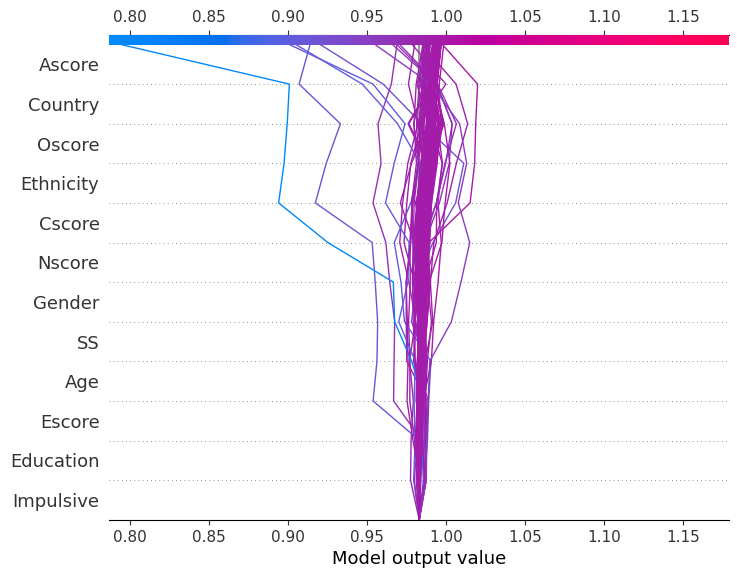

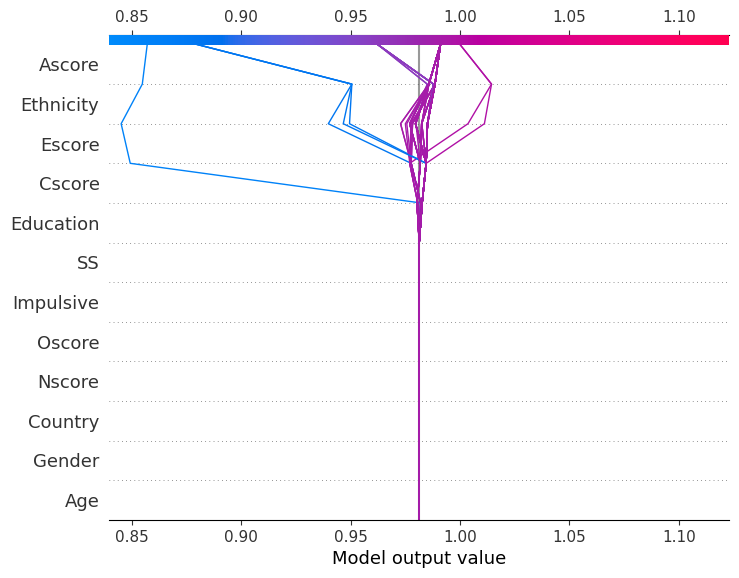

In [106]:
# Decision Plot for multiple instances in the best model
shap.decision_plot(explainer_best.expected_value[1], shap_values_best_class_1[:100], X_test[:100], feature_names=list(X.columns))

# Decision Plot for multiple instances in the worst model
shap.decision_plot(explainer_worst.expected_value[1], shap_values_worst_class_1[:100], X_test[:100], feature_names=list(X.columns))


Dependence plot for feature: Age (Best Model, No Interaction)


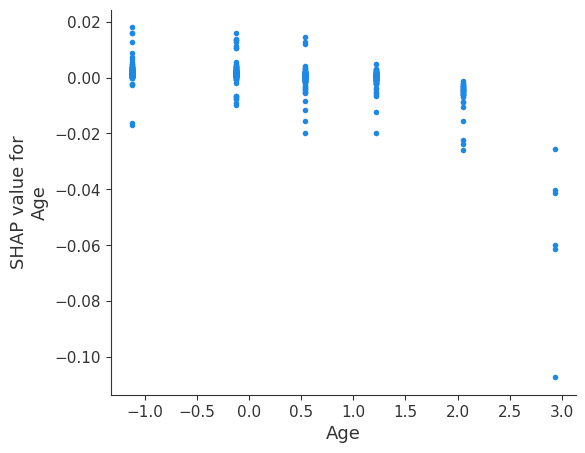

Dependence plot for feature: Gender (Best Model, No Interaction)


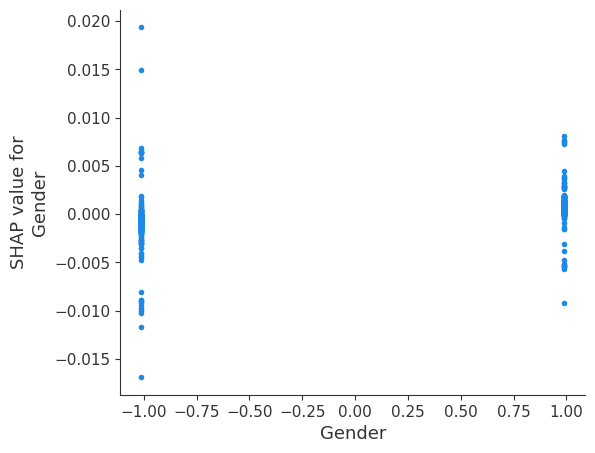

Dependence plot for feature: Education (Best Model, No Interaction)


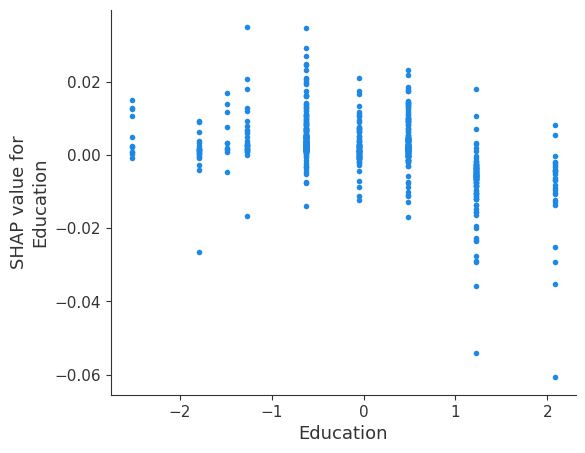

Dependence plot for feature: Country (Best Model, No Interaction)


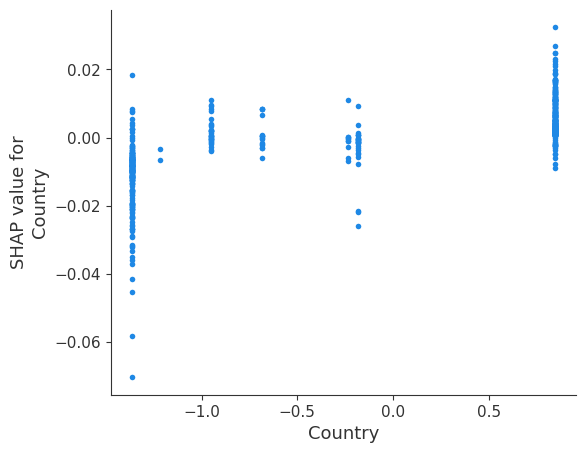

Dependence plot for feature: Ethnicity (Best Model, No Interaction)


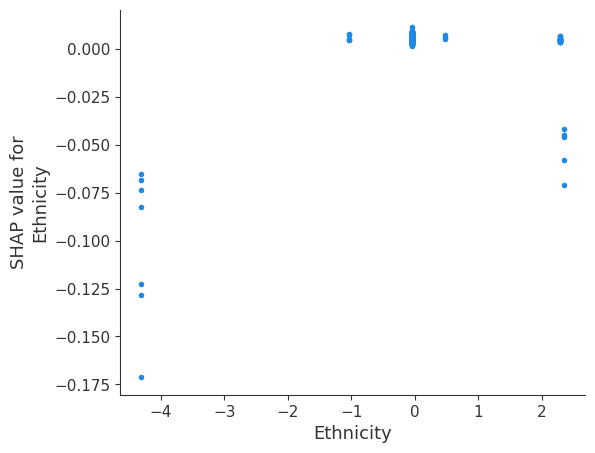

Dependence plot for feature: Nscore (Best Model, No Interaction)


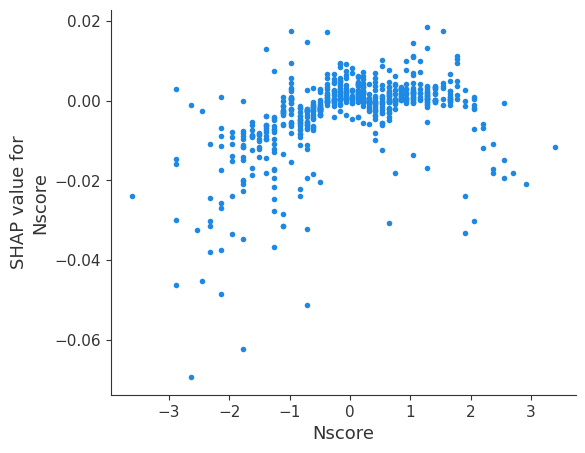

Dependence plot for feature: Escore (Best Model, No Interaction)


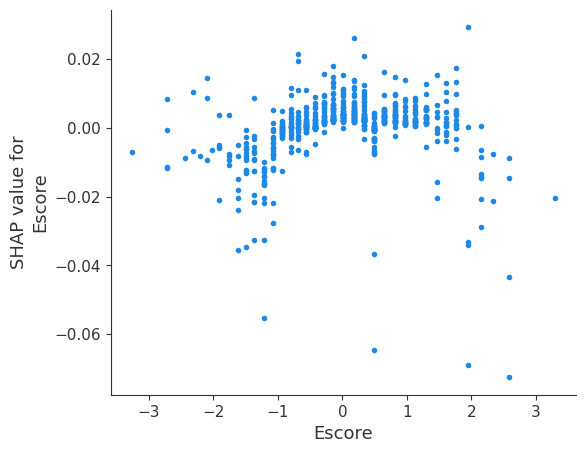

Dependence plot for feature: Oscore (Best Model, No Interaction)


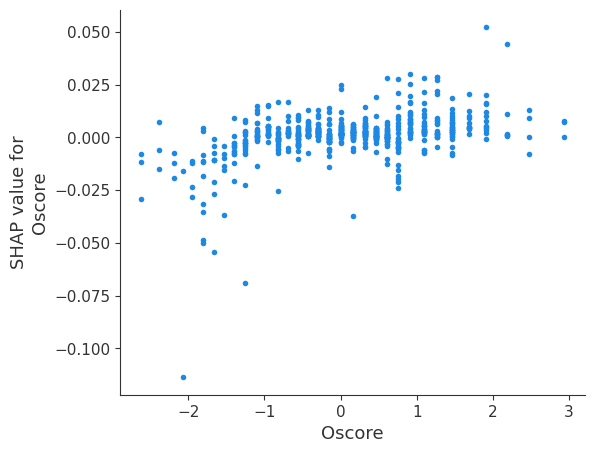

Dependence plot for feature: Ascore (Best Model, No Interaction)


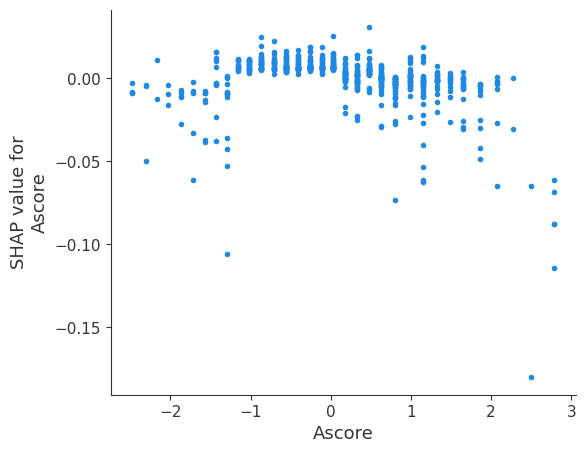

Dependence plot for feature: Cscore (Best Model, No Interaction)


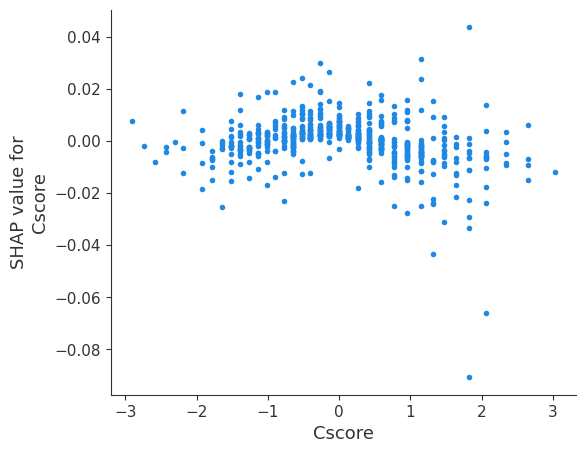

Dependence plot for feature: Impulsive (Best Model, No Interaction)


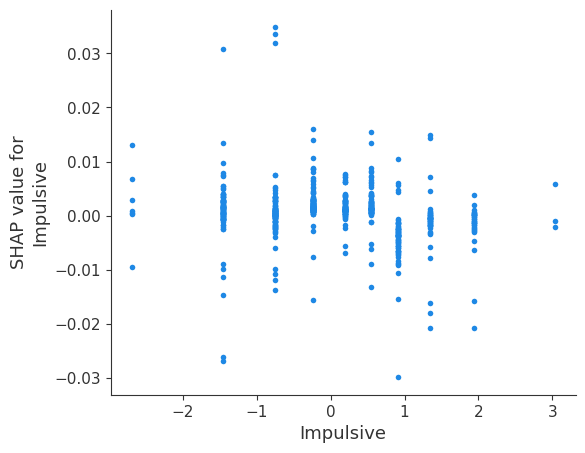

Dependence plot for feature: SS (Best Model, No Interaction)


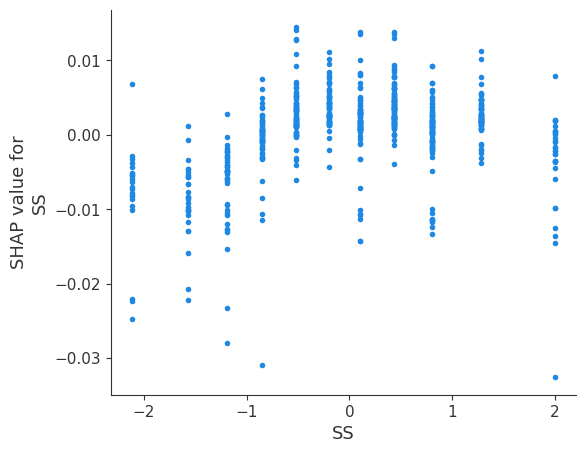

Dependence plot for feature: Age (Worst Model, No Interaction)


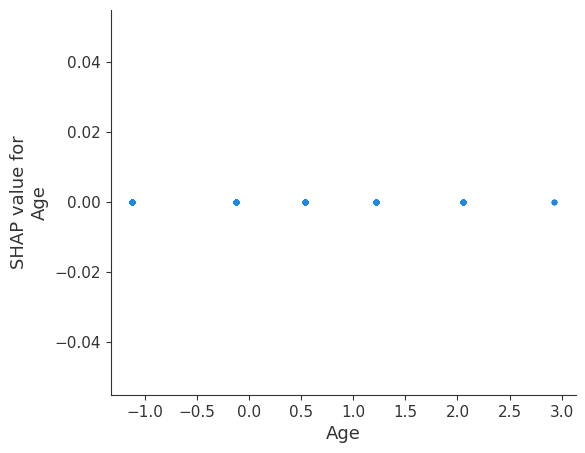

Dependence plot for feature: Gender (Worst Model, No Interaction)


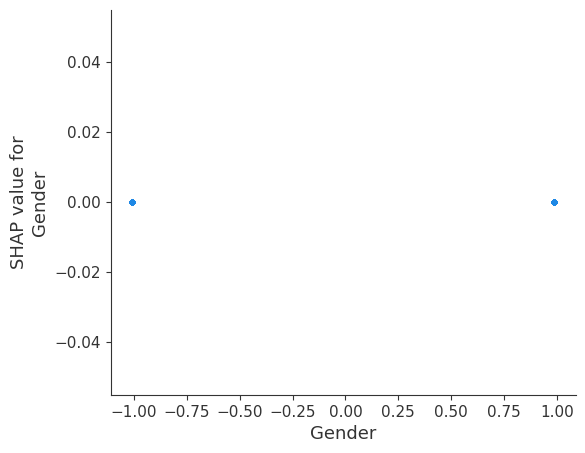

Dependence plot for feature: Education (Worst Model, No Interaction)


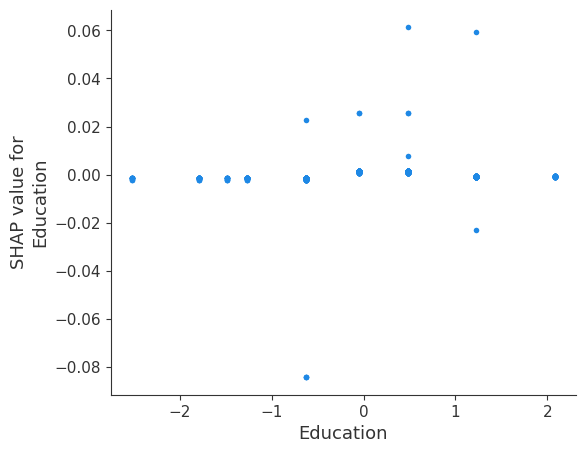

Dependence plot for feature: Country (Worst Model, No Interaction)


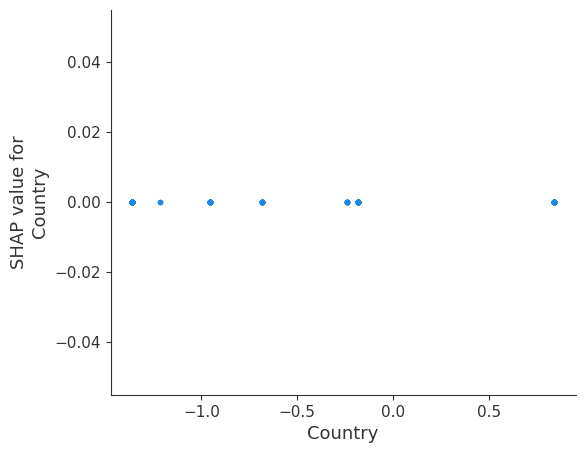

Dependence plot for feature: Ethnicity (Worst Model, No Interaction)


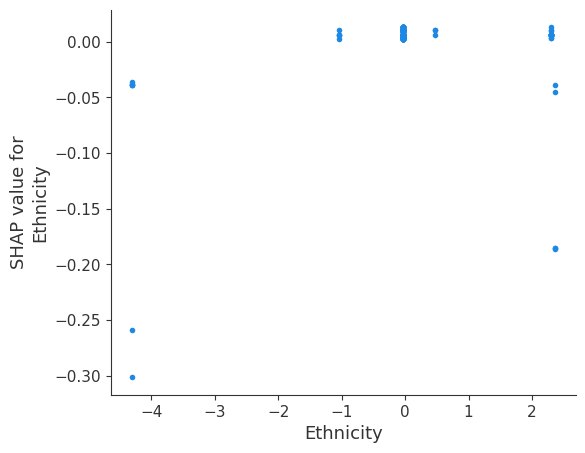

Dependence plot for feature: Nscore (Worst Model, No Interaction)


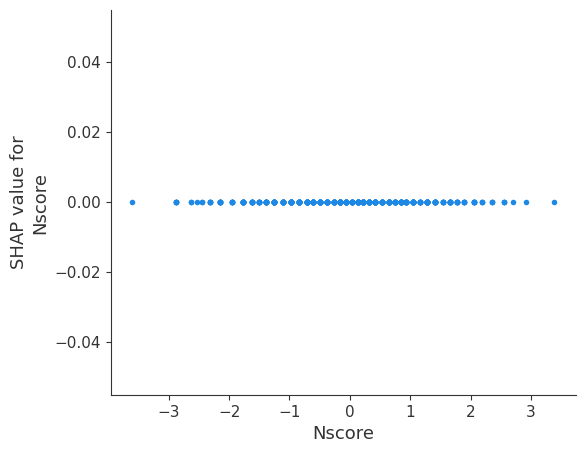

Dependence plot for feature: Escore (Worst Model, No Interaction)


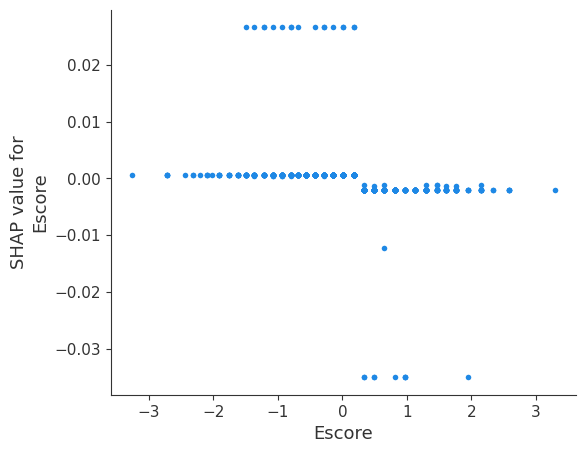

Dependence plot for feature: Oscore (Worst Model, No Interaction)


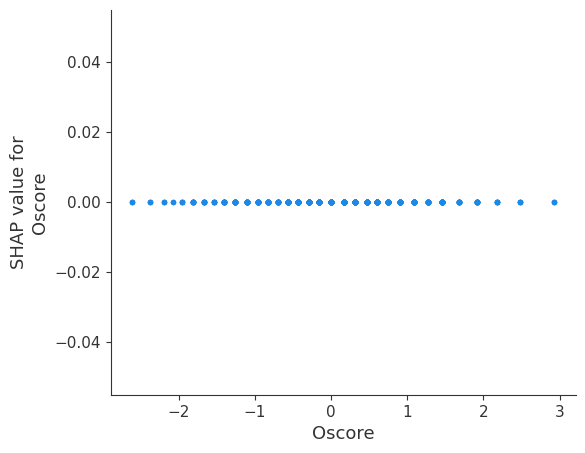

Dependence plot for feature: Ascore (Worst Model, No Interaction)


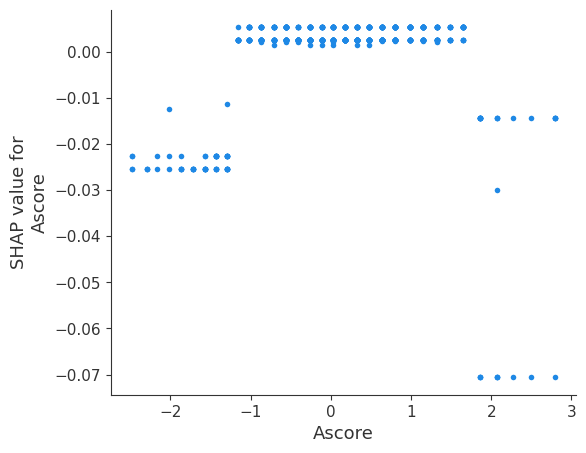

Dependence plot for feature: Cscore (Worst Model, No Interaction)


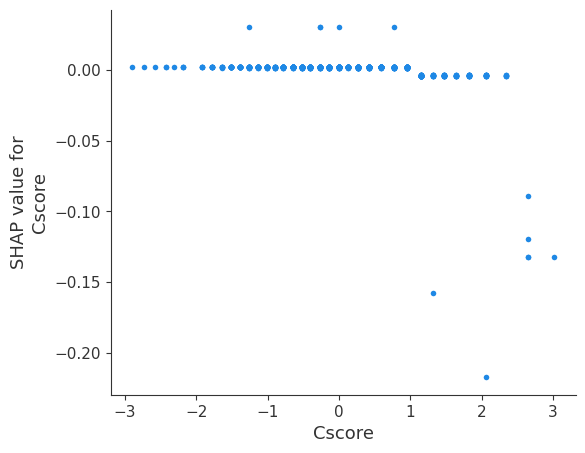

Dependence plot for feature: Impulsive (Worst Model, No Interaction)


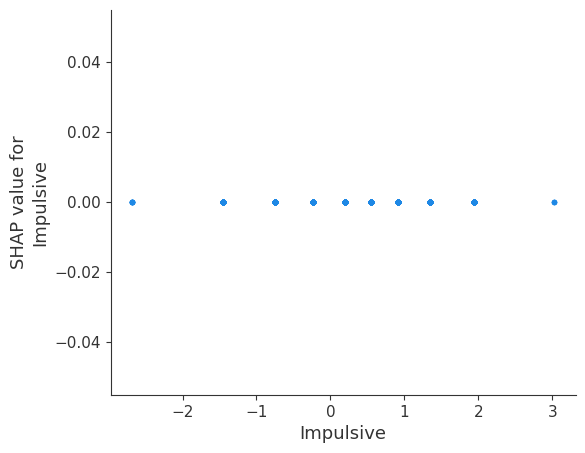

Dependence plot for feature: SS (Worst Model, No Interaction)


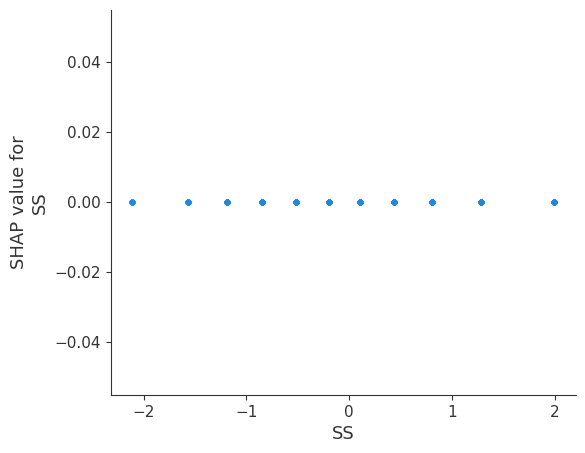

In [15]:
# Dependence plot without interaction for each feature in the best model
for feature in feature_names:
    print(f"Dependence plot for feature: {feature} (Best Model, No Interaction)")
    X_test_df = pd.DataFrame(X_test, columns=feature_names)
    shap.dependence_plot(feature, shap_values_best_class_1, X_test_df, interaction_index=None)

# Dependence plot without interaction for each feature in the worst model
for feature in feature_names:
    print(f"Dependence plot for feature: {feature} (Worst Model, No Interaction)")
    X_test_df = pd.DataFrame(X_test, columns=feature_names)
    shap.dependence_plot(feature, shap_values_worst_class_1, X_test_df, interaction_index=None)


#**Interaction Plot**

Dependence plot for feature: Age (Best Model)


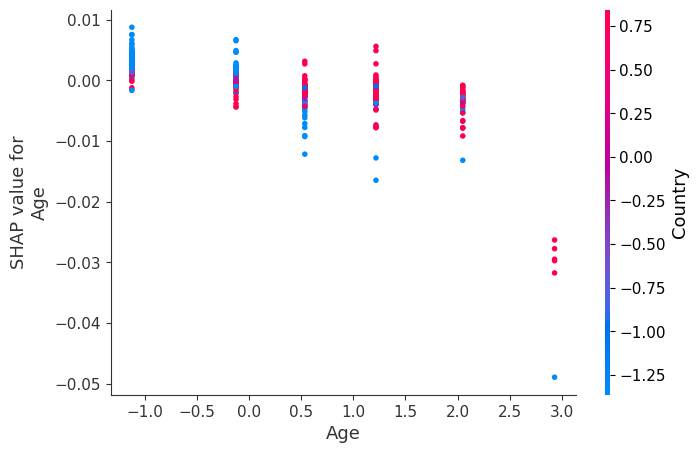

Dependence plot for feature: Gender (Best Model)


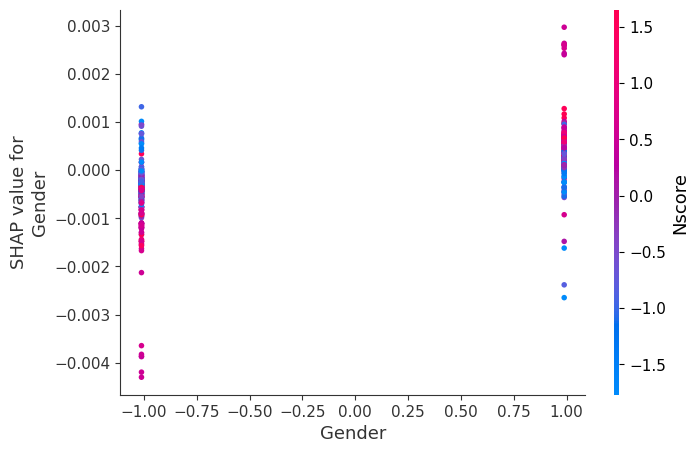

Dependence plot for feature: Education (Best Model)


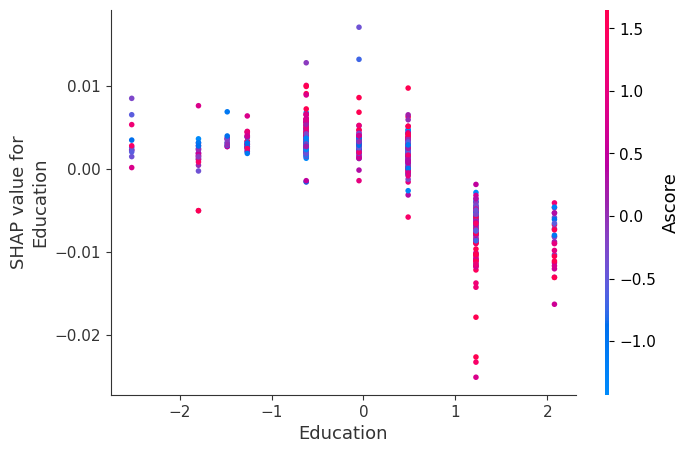

Dependence plot for feature: Country (Best Model)


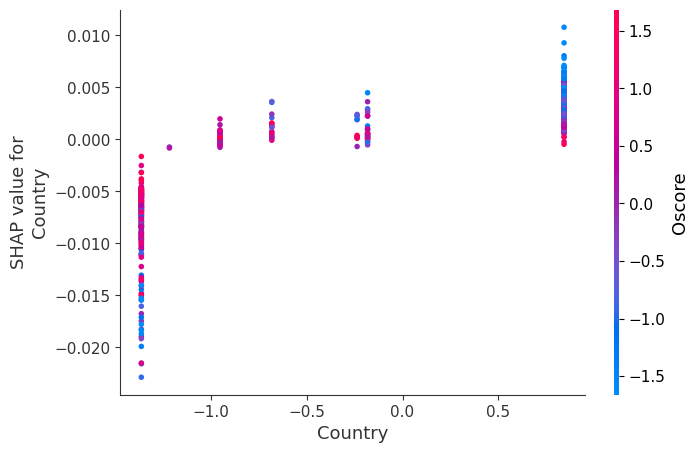

Dependence plot for feature: Ethnicity (Best Model)


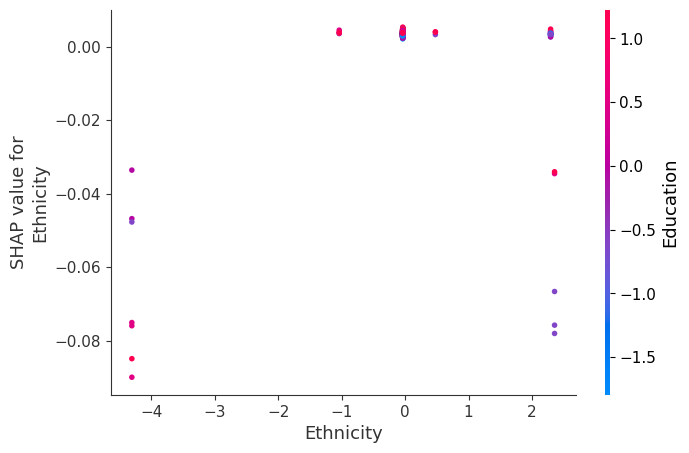

Dependence plot for feature: Nscore (Best Model)


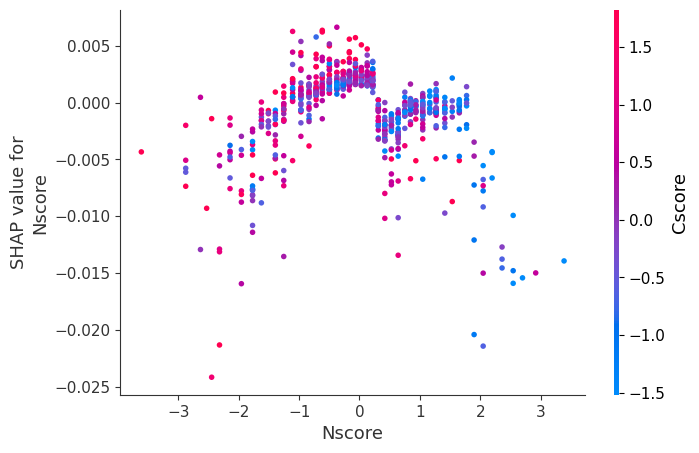

Dependence plot for feature: Escore (Best Model)


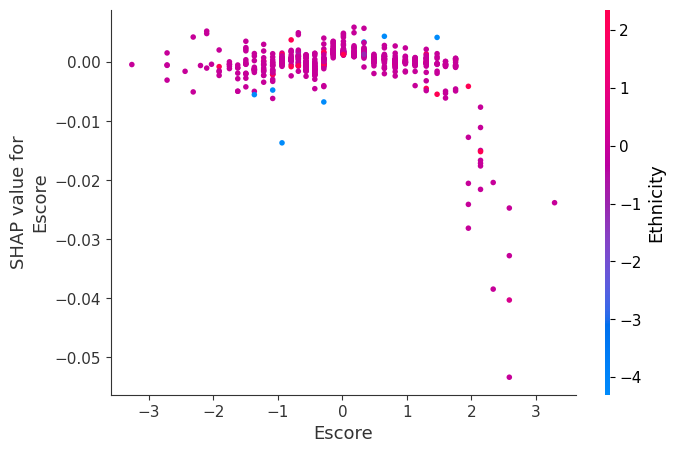

Dependence plot for feature: Oscore (Best Model)


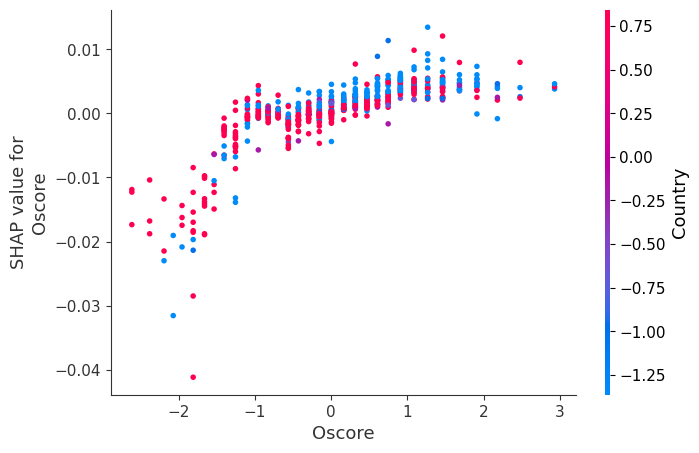

Dependence plot for feature: Ascore (Best Model)


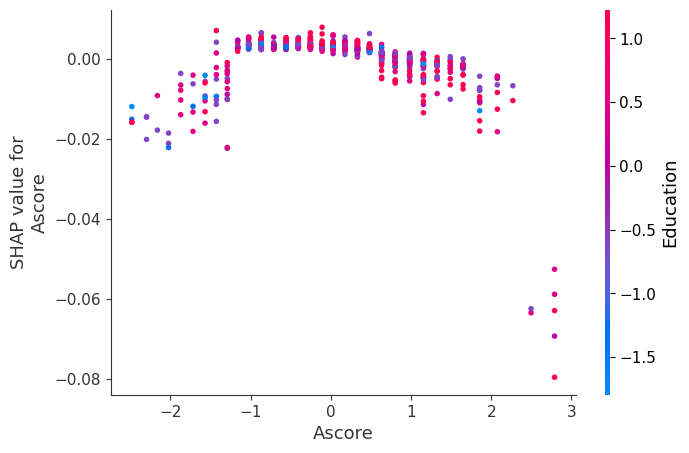

Dependence plot for feature: Cscore (Best Model)


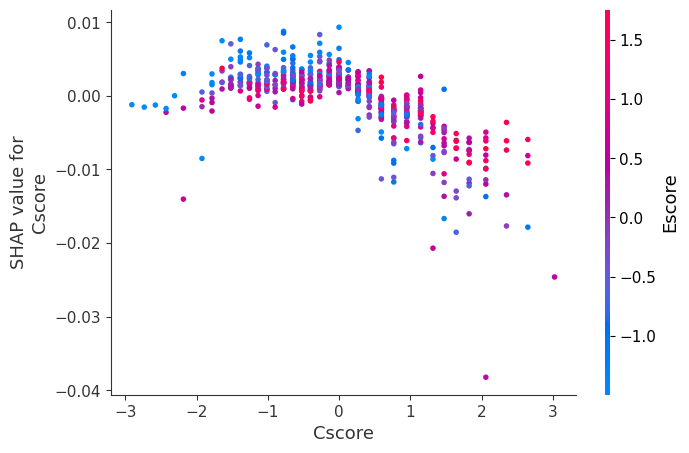

Dependence plot for feature: Impulsive (Best Model)


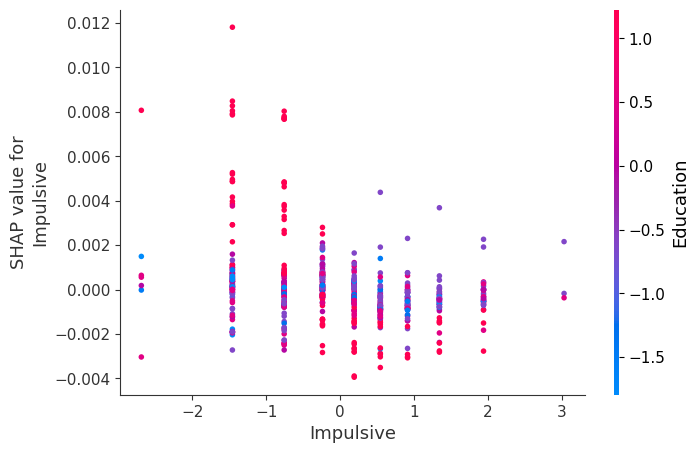

Dependence plot for feature: SS (Best Model)


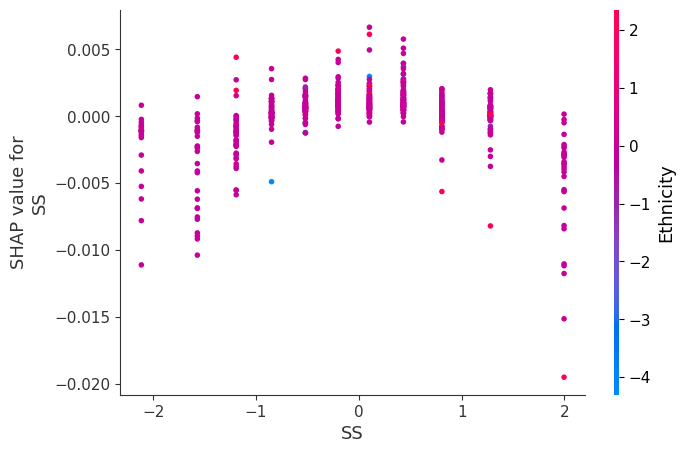

Dependence plot for feature: Age (Worst Model)


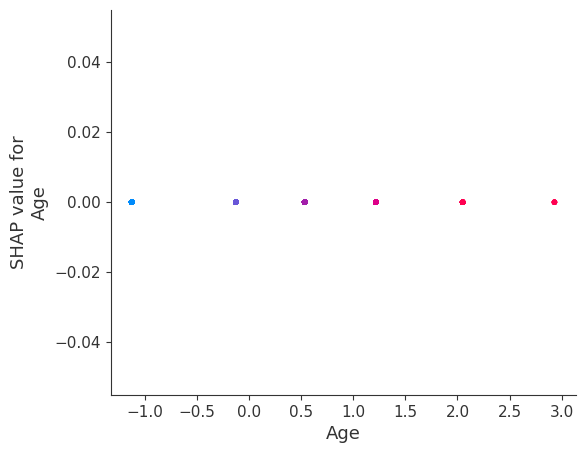

Dependence plot for feature: Gender (Worst Model)


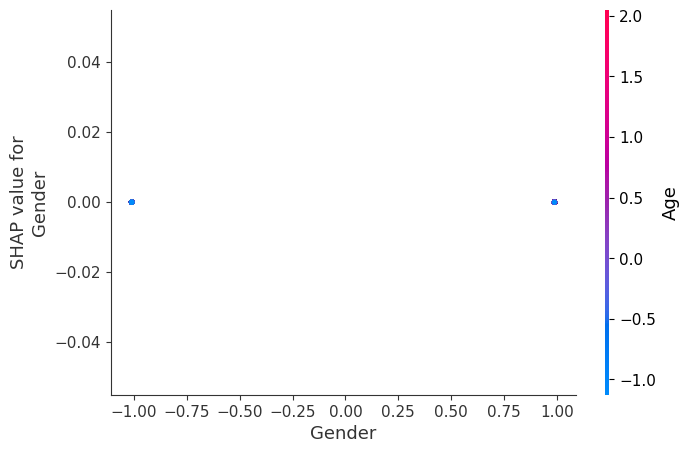

Dependence plot for feature: Education (Worst Model)


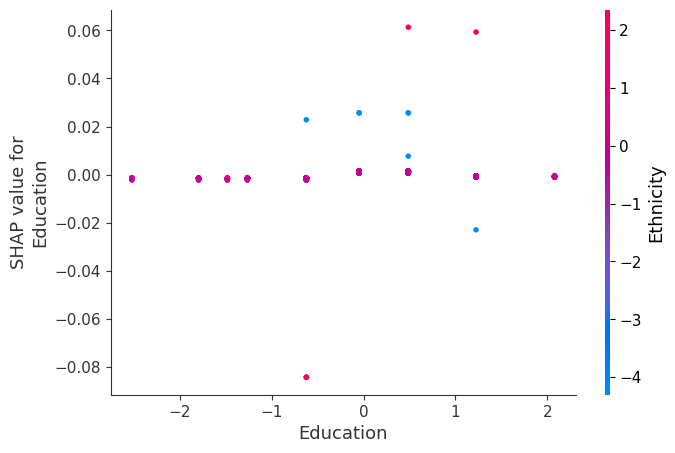

Dependence plot for feature: Country (Worst Model)


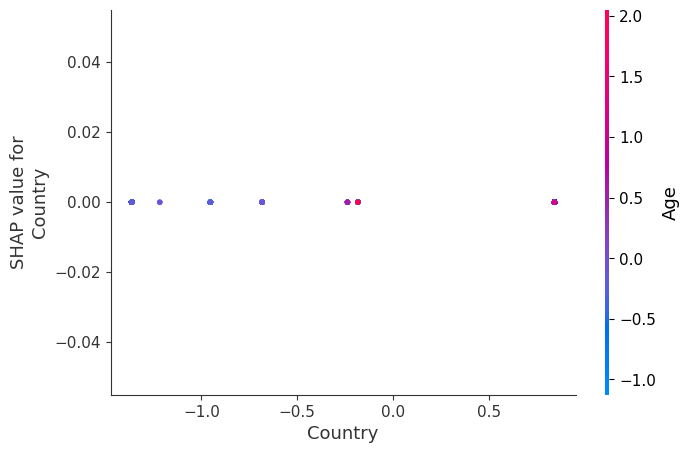

Dependence plot for feature: Ethnicity (Worst Model)


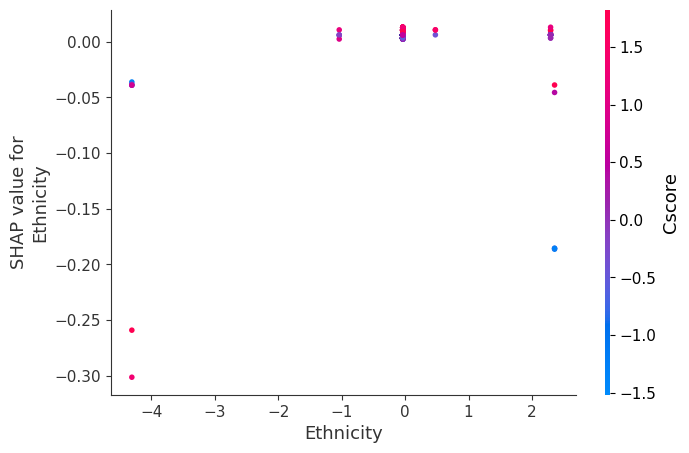

Dependence plot for feature: Nscore (Worst Model)


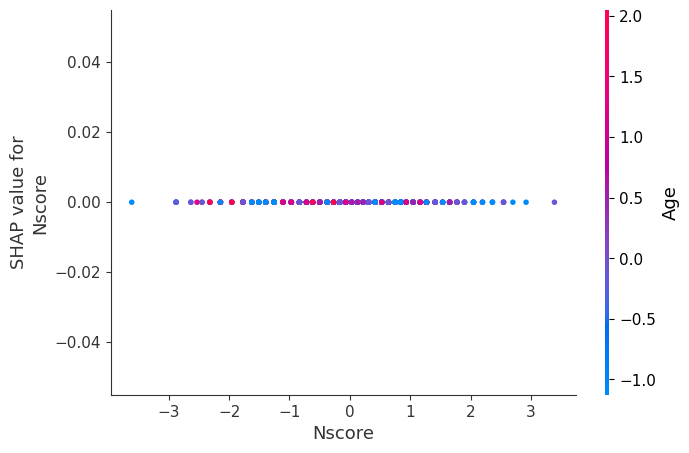

Dependence plot for feature: Escore (Worst Model)


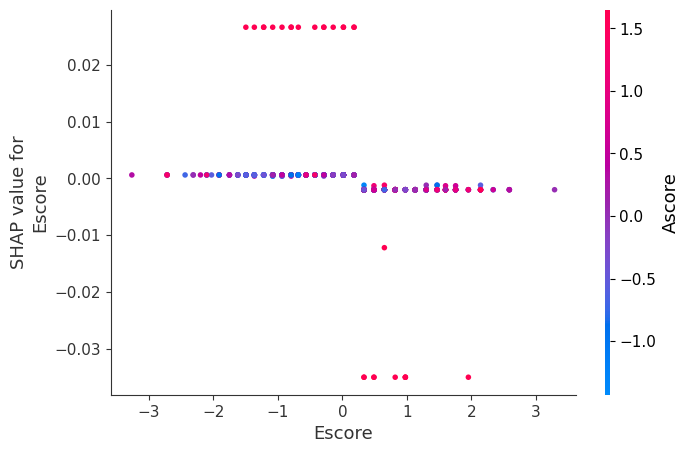

Dependence plot for feature: Oscore (Worst Model)


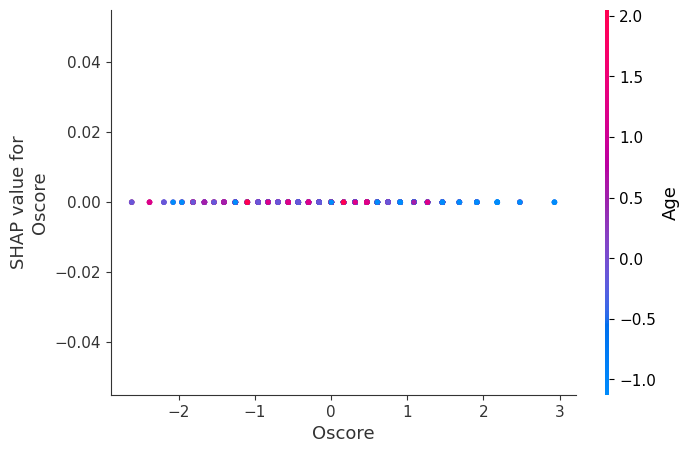

Dependence plot for feature: Ascore (Worst Model)


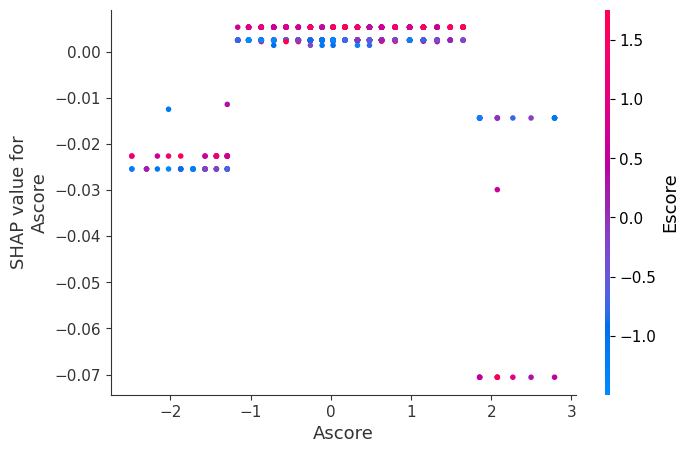

Dependence plot for feature: Cscore (Worst Model)


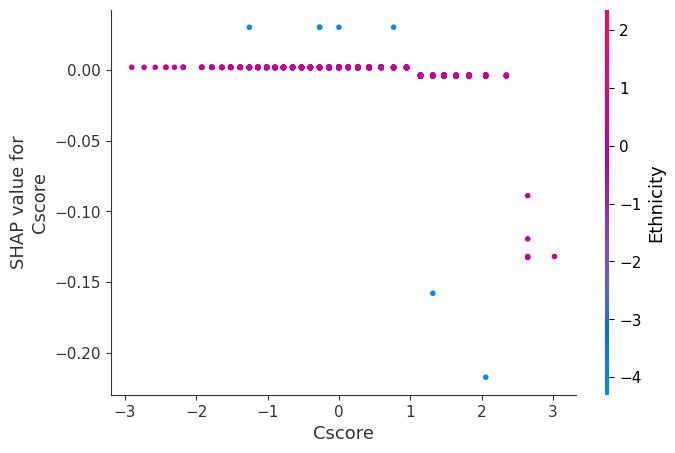

Dependence plot for feature: Impulsive (Worst Model)


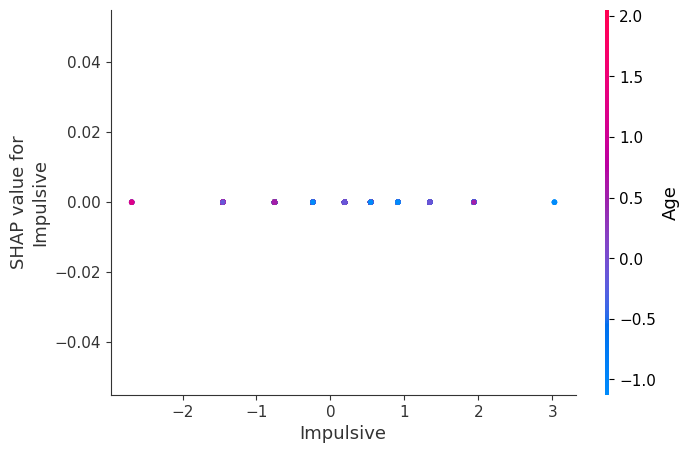

Dependence plot for feature: SS (Worst Model)


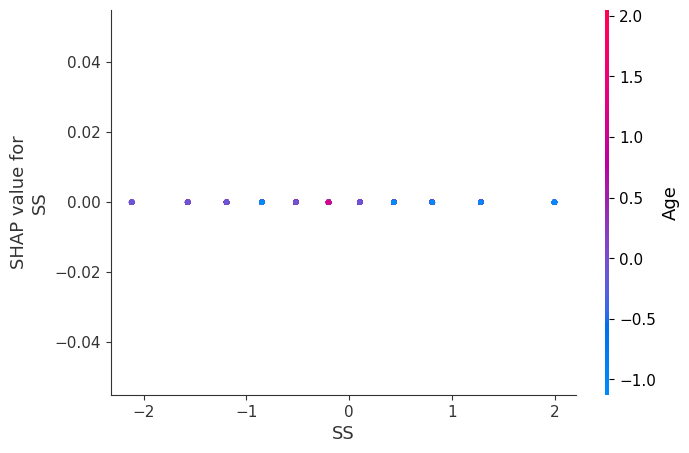

In [33]:
feature_names = list(X.columns)

# Interaction plots for all features in the best model
for feature in feature_names:
    print(f"Dependence plot for feature: {feature} (Best Model)")
    X_test_df = pd.DataFrame(X_test, columns=feature_names)
    shap.dependence_plot(feature, shap_values_best_class_1, X_test_df)

# Interaction plots for all features in the worst model
for feature in feature_names:
    print(f"Dependence plot for feature: {feature} (Worst Model)")
    X_test_df = pd.DataFrame(X_test, columns=feature_names)
    shap.dependence_plot(feature, shap_values_worst_class_1, X_test_df)

#**MAGIC MUSHROOMS DATASET**

#**Importing The Dependencies**

In [ ]:
import shap
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV, train_test_split, KFold
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.metrics import accuracy_score
import random
import shap

#**Models**

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,



Best model parameters for Random Forest Learner: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 5, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}

Accuracy (Best Model): 0.7379095163806553
Fitting 5 folds for each of 10 candidates, totalling 50 fits

Worst model parameters for Decision Tree Learner: {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 20, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': None, 'splitter': 'best'}

Accuracy (worst Model): 0.6833073322932918
Shape of shap_values_best_class_

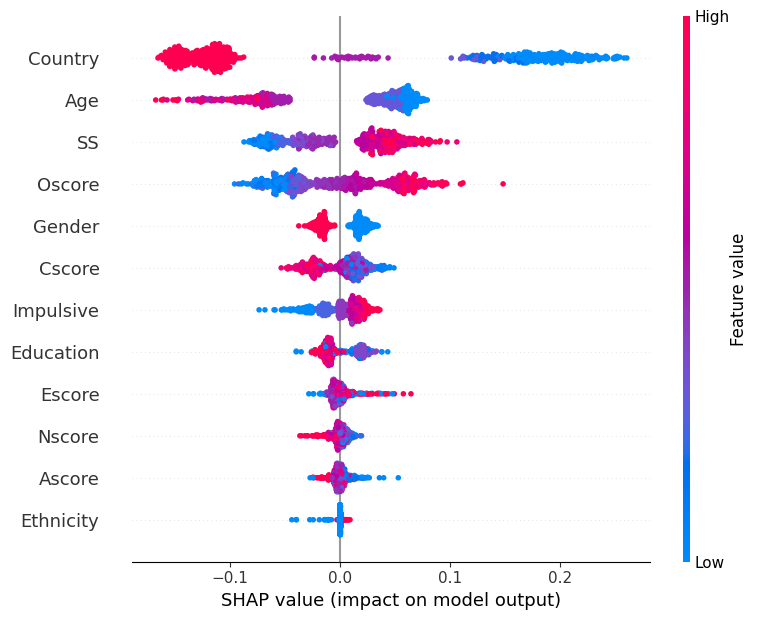

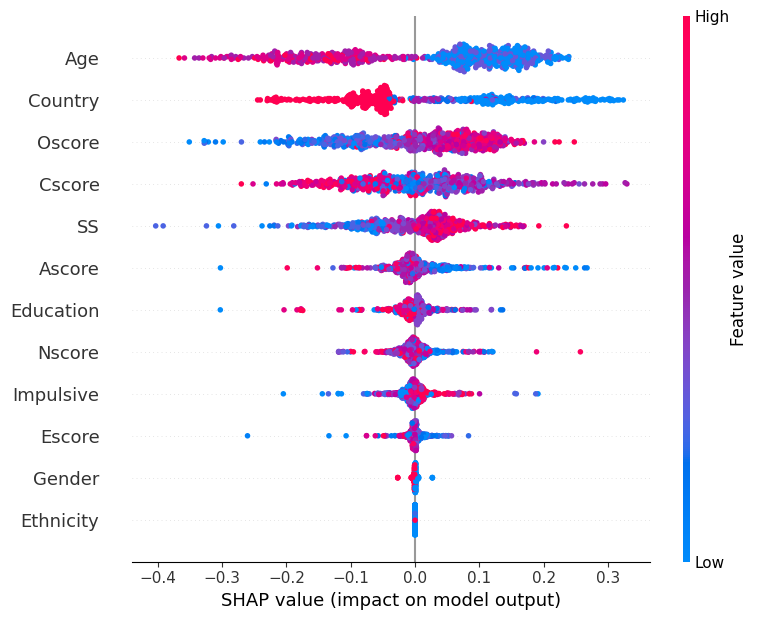

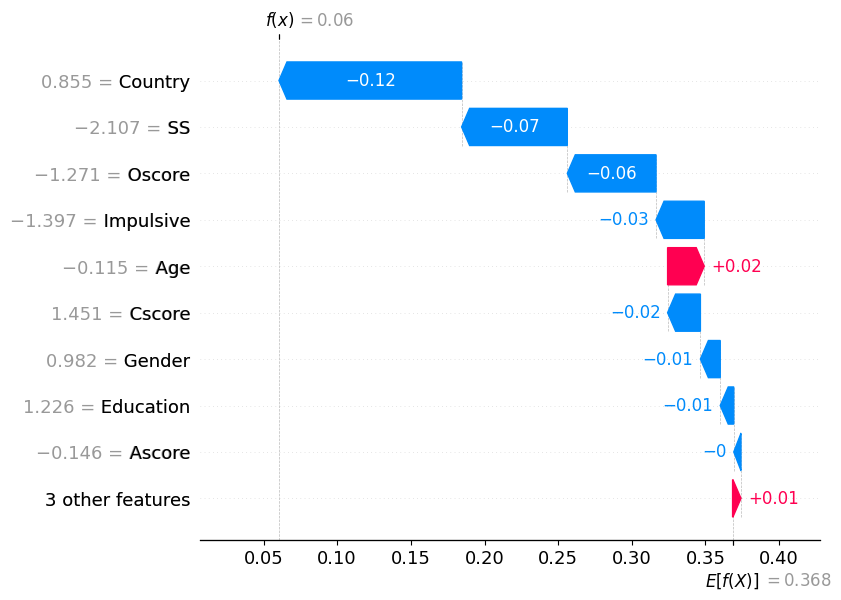

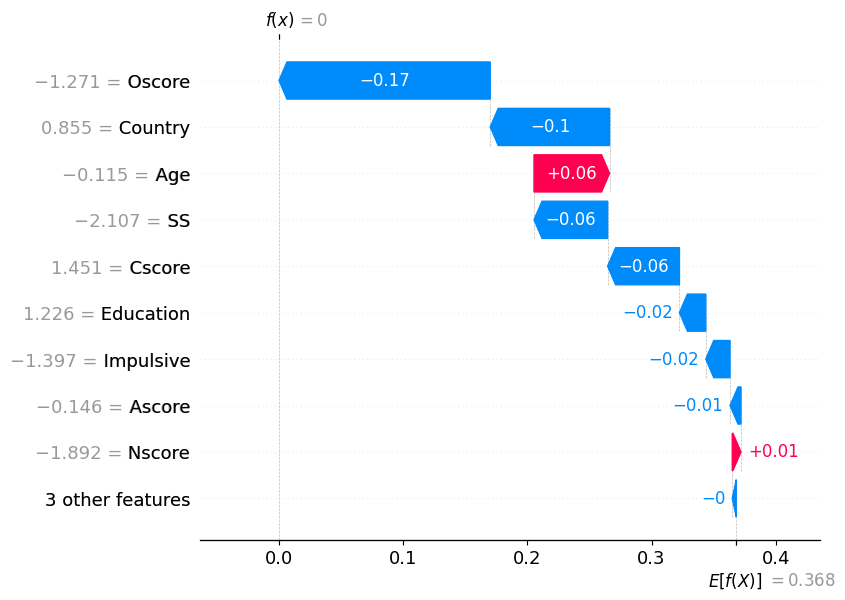

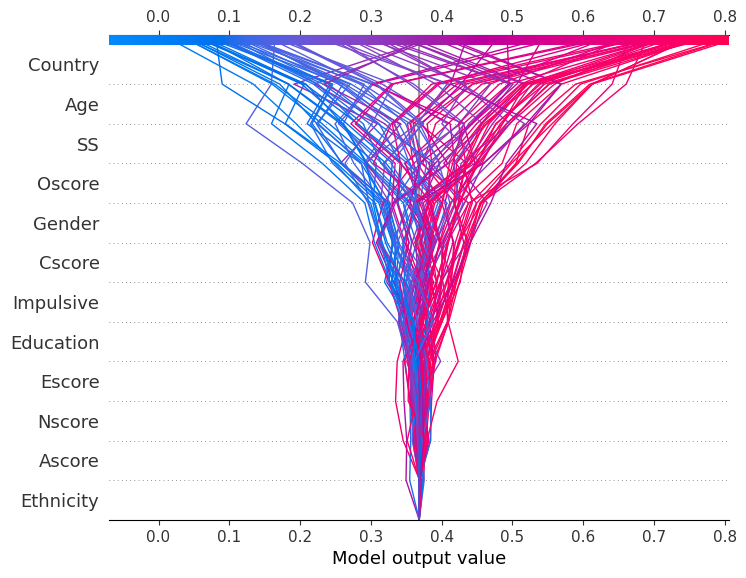

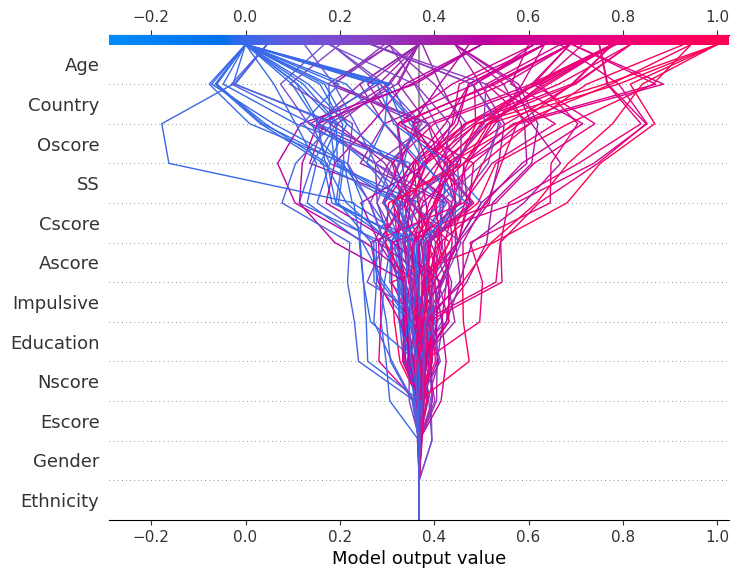

Dependence plot for feature: Age (Best Model)


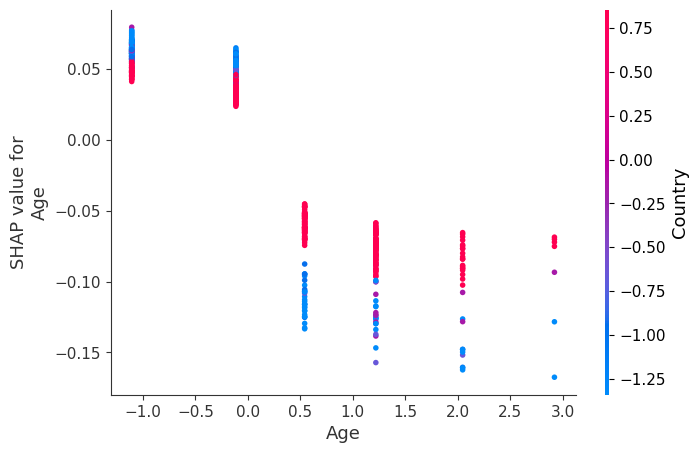

Dependence plot for feature: Gender (Best Model)


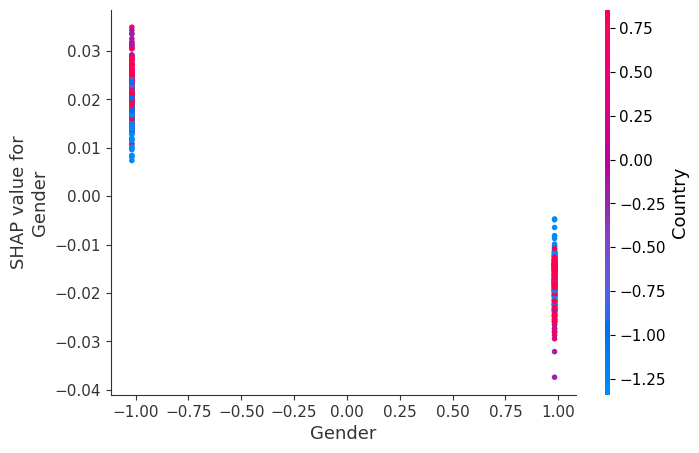

Dependence plot for feature: Education (Best Model)


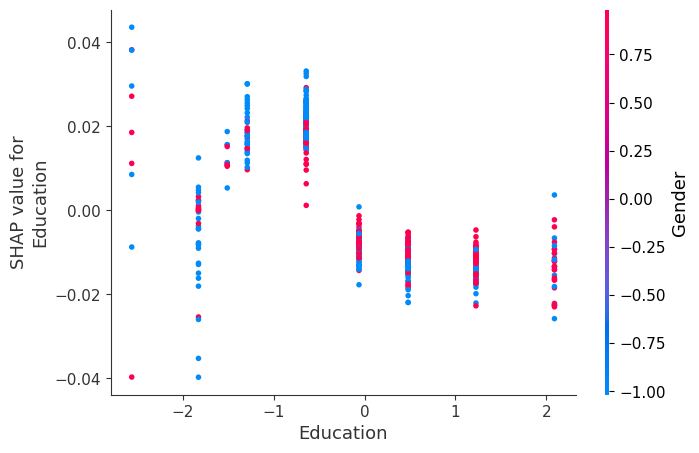

Dependence plot for feature: Country (Best Model)


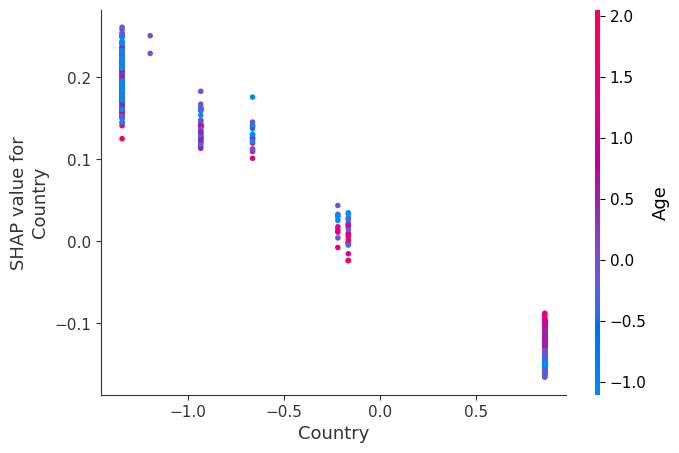

Dependence plot for feature: Ethnicity (Best Model)


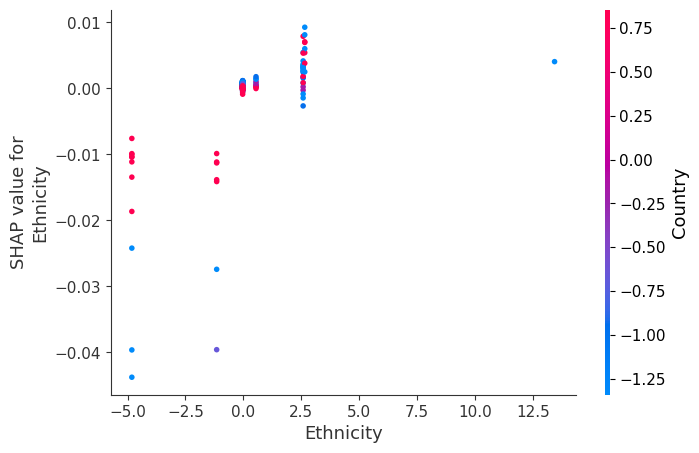

Dependence plot for feature: Nscore (Best Model)


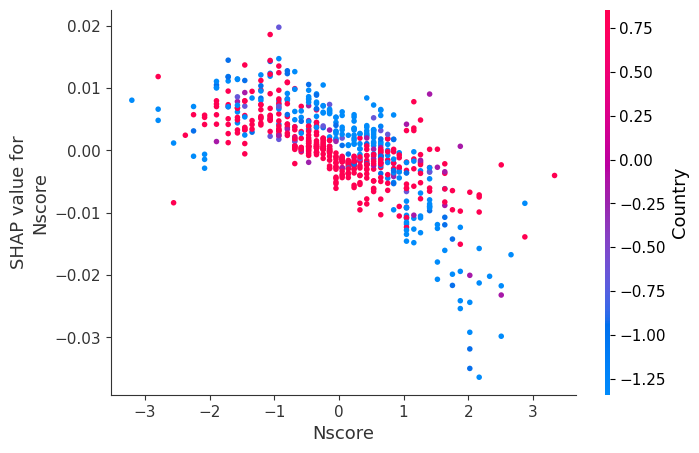

Dependence plot for feature: Escore (Best Model)


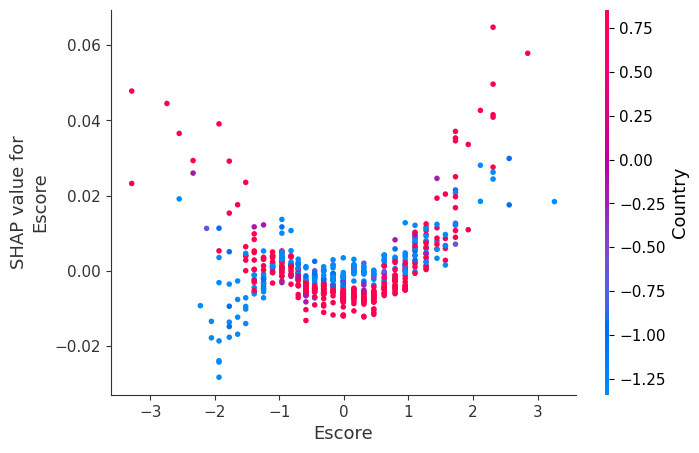

Dependence plot for feature: Oscore (Best Model)


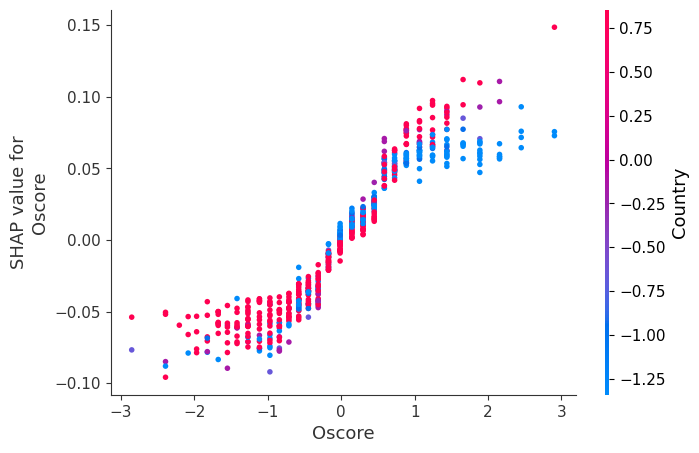

Dependence plot for feature: Ascore (Best Model)


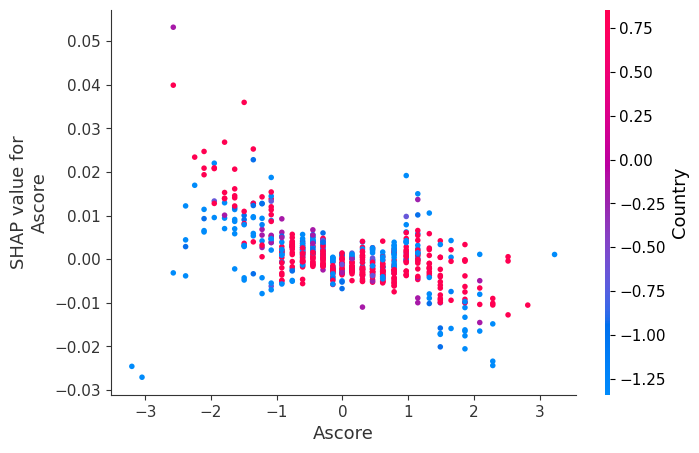

Dependence plot for feature: Cscore (Best Model)


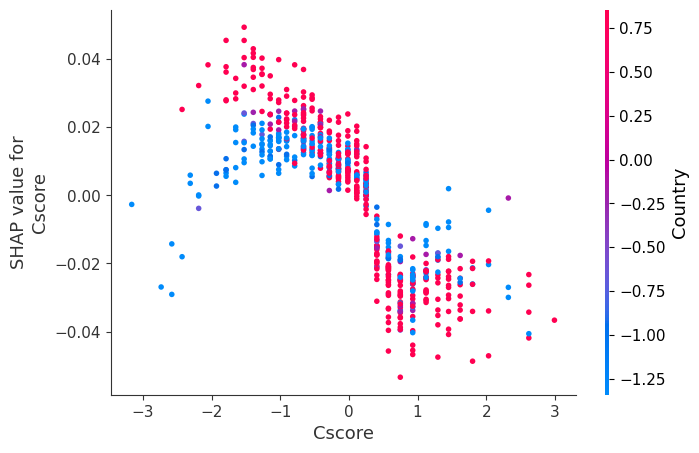

Dependence plot for feature: Impulsive (Best Model)


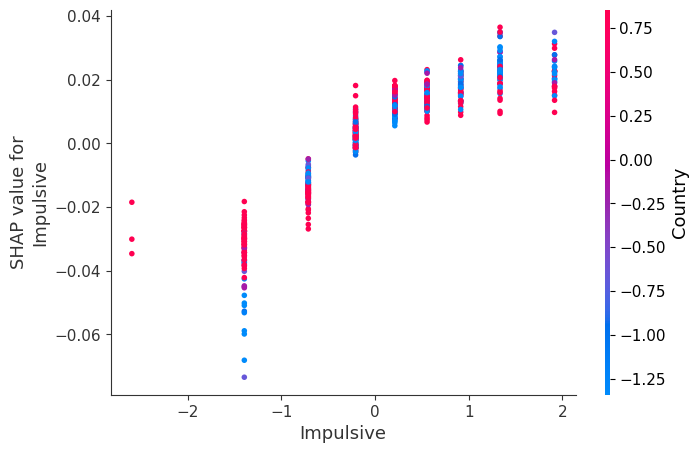

Dependence plot for feature: SS (Best Model)


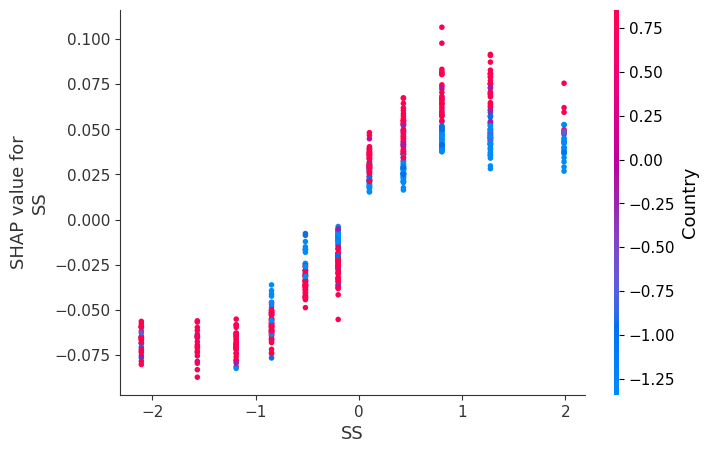

Dependence plot for feature: Age (Worst Model)


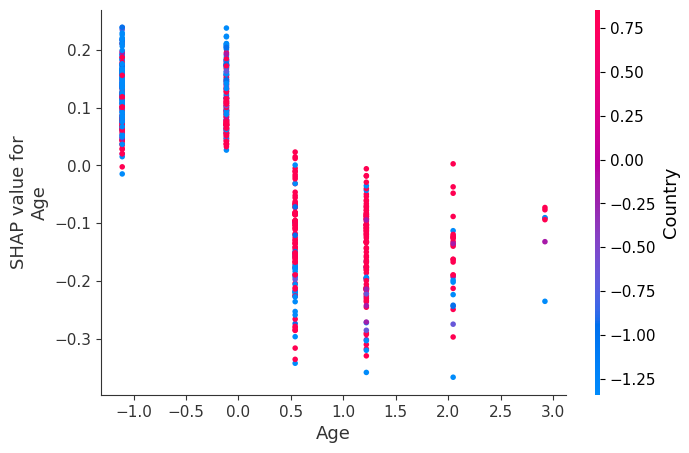

Dependence plot for feature: Gender (Worst Model)


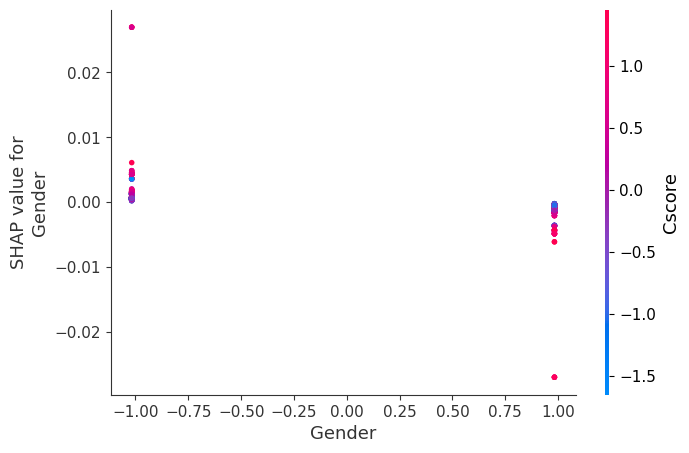

Dependence plot for feature: Education (Worst Model)


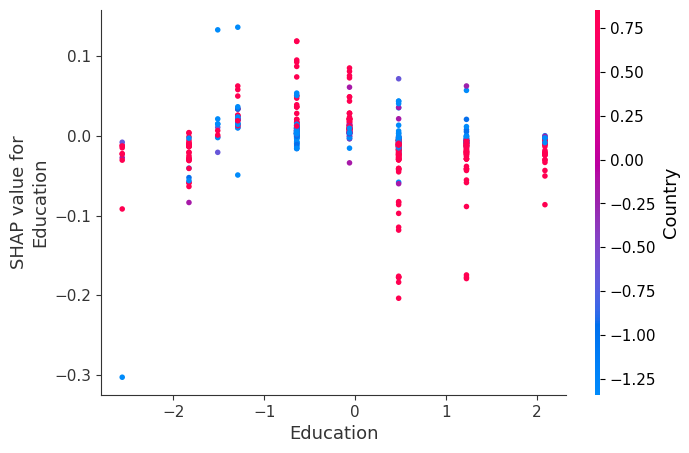

Dependence plot for feature: Country (Worst Model)


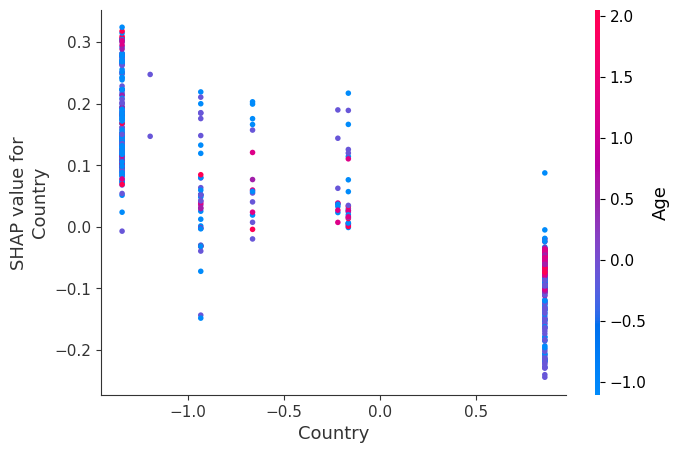

Dependence plot for feature: Ethnicity (Worst Model)


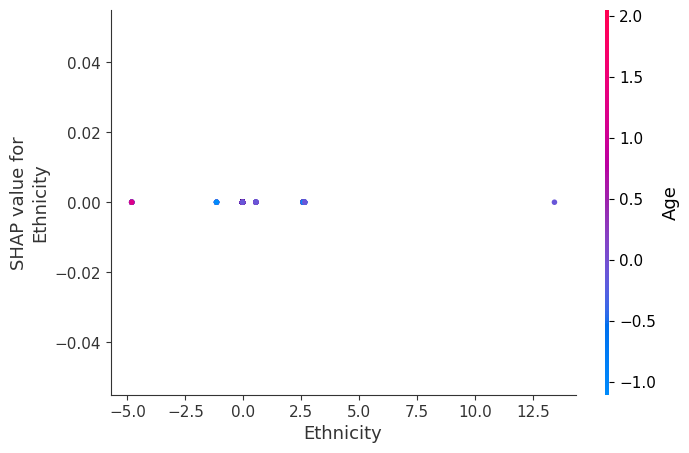

Dependence plot for feature: Nscore (Worst Model)


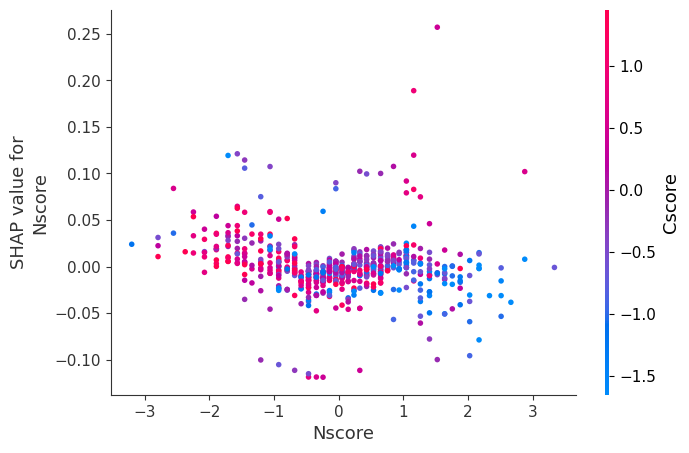

Dependence plot for feature: Escore (Worst Model)


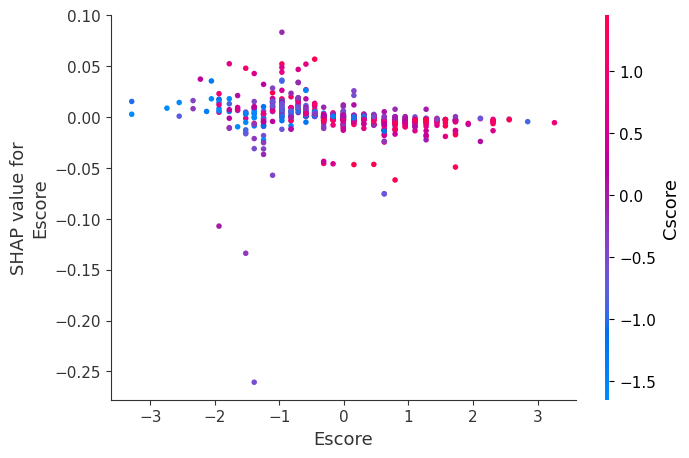

Dependence plot for feature: Oscore (Worst Model)


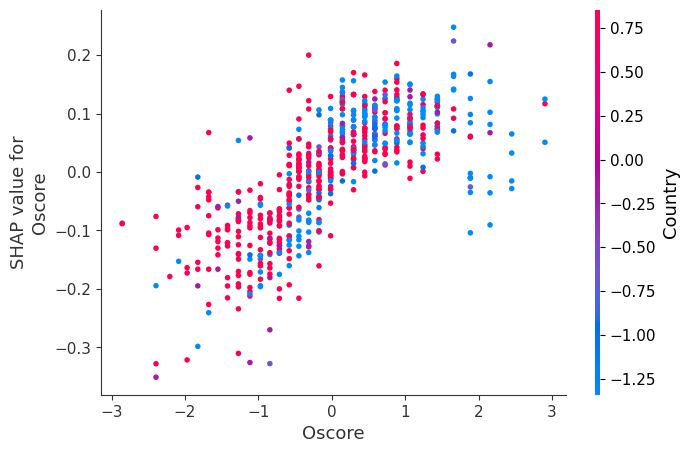

Dependence plot for feature: Ascore (Worst Model)


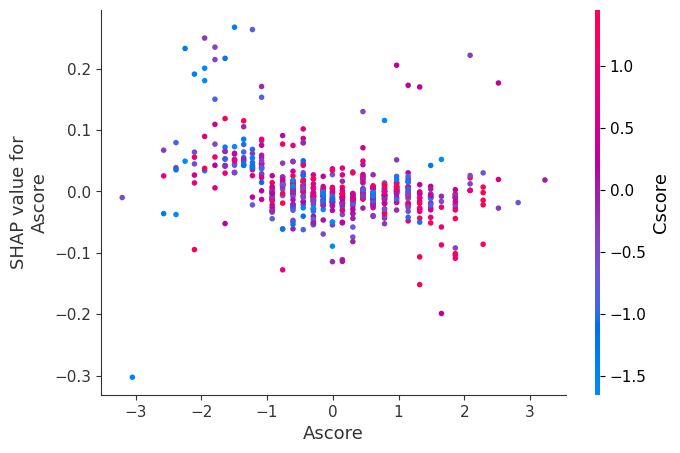

Dependence plot for feature: Cscore (Worst Model)


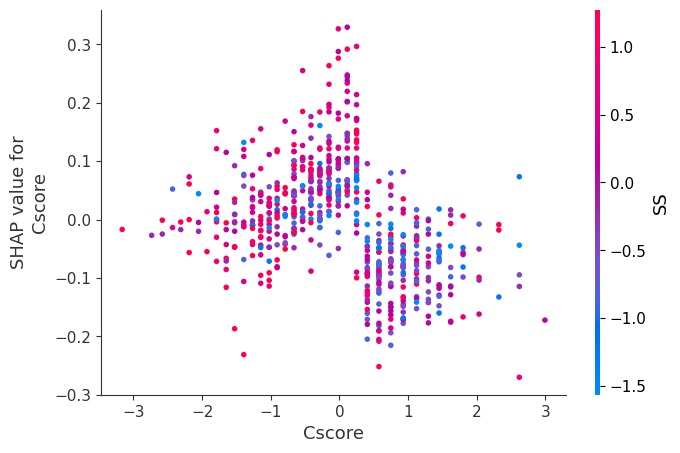

Dependence plot for feature: Impulsive (Worst Model)


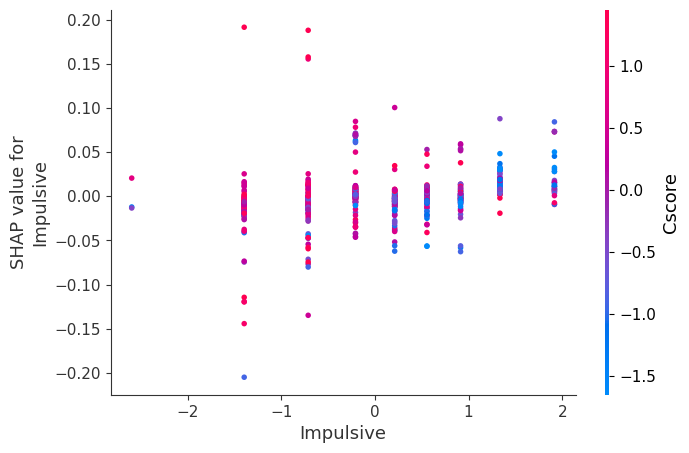

Dependence plot for feature: SS (Worst Model)


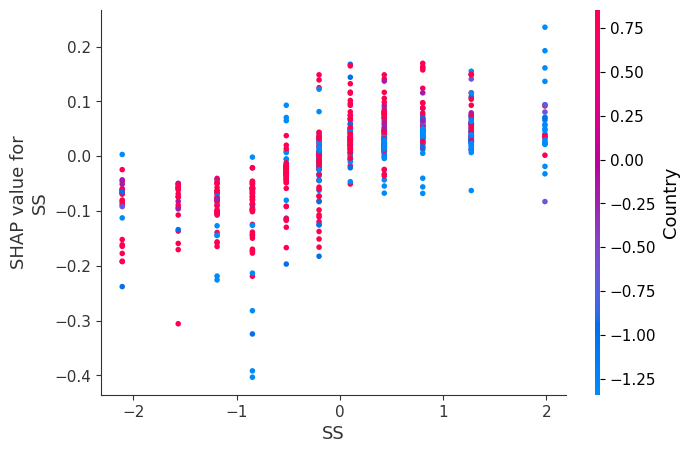

In [48]:
file_path = '/content/mushroom_dataset.csv'
data = pd.read_csv(file_path)
X = data.iloc[:, :-1]
y = data['Mushroom'].apply(lambda x: 1 if x == 1 else 0)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.34, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10, 20, 40],
    'max_features': ['sqrt', 'log2']
}

kf = KFold(n_splits=5, shuffle=True, random_state=2209)
model_rf = RandomForestClassifier()
grid_search = RandomizedSearchCV(model_rf, param_grid, cv=kf, verbose=1)
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
print("\nBest model parameters for Random Forest Learner:", best_model.get_params())
best_model.fit(X_train, y_train)
train_accuracy = accuracy_score(y_train, best_model.predict(X_train))
test_accuracy = accuracy_score(y_test, best_model.predict(X_test))

print("\nAccuracy (Best Model):", test_accuracy)
Param_grid = {
     'criterion': ['gini', 'entropy'],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10, 20, 40],
    'max_features': ['sqrt', 'log2']
}
model_dt = DecisionTreeClassifier()
Grid_search = RandomizedSearchCV(model_dt, Param_grid, cv=kf, verbose=1)
Grid_search.fit(X_train, y_train)

worst_model = Grid_search.best_estimator_
print("\nWorst model parameters for Decision Tree Learner:", worst_model.get_params())

worst_model.fit(X_train, y_train)
train_accuracy = accuracy_score(y_train, worst_model.predict(X_train))
test_accuracy = accuracy_score(y_test, worst_model.predict(X_test))

print("\nAccuracy (worst Model):", test_accuracy)

explainer_best = shap.TreeExplainer(best_model, model_output='raw', approximate=True)


shap_values_best = explainer_best.shap_values(X_test)
explainer_worst = shap.TreeExplainer(worst_model, model_output='raw', approximate=True)

shap_values_worst = explainer_worst.shap_values(X_test)

shap_values_best_class_1 = shap_values_best[:, :, 1]
shap_values_worst_class_1 = shap_values_worst[:, :, 1]


# Check shapes for verification
print("Shape of shap_values_best_class_1:", shap_values_best_class_1.shape)
print("Shape of shap_values_worst_class_1:", shap_values_worst_class_1.shape)
print("Shape of X_test:", X_test.shape)

print("\nSHAP values for best model, class 1 (first instance):")
print(shap_values_best_class_1[0])
print("\nSHAP values for worst model, class 1 (first instance):")
print(shap_values_worst_class_1[0])


shap_values_best_class_1.shape == X_test.shape
shap.summary_plot(shap_values_best_class_1, X_test, plot_type="dot", feature_names=list(X.columns))


shap_values_worst_class_1.shape == X_test.shape
shap.summary_plot(shap_values_worst_class_1, X_test, plot_type="dot", feature_names=list(X.columns))
#Select a random instance for the force plot
data_index = random.randint(0, X_test.shape[0] - 1)

from IPython.display import display
data_index = random.randint(0, X_test.shape[0] - 1)

# Force Plot for the best model
shap.initjs()
force_plot_best = shap.force_plot(explainer_best.expected_value[1], shap_values_best_class_1[data_index], X_test[data_index], feature_names=list(X.columns))
display(force_plot_best)

# Force Plot for the worst model
force_plot_worst = shap.force_plot(explainer_worst.expected_value[1], shap_values_worst_class_1[data_index], X_test[data_index], feature_names=list(X.columns))
display(force_plot_worst)
shap.waterfall_plot(shap.Explanation(values=shap_values_best_class_1[data_index], base_values=explainer_best.expected_value[1], data=X_test[data_index], feature_names=list(X.columns)))

# Waterfall Plot for the worst model
shap.waterfall_plot(shap.Explanation(values=shap_values_worst_class_1[data_index], base_values=explainer_worst.expected_value[1], data=X_test[data_index], feature_names=list(X.columns)))

# Decision Plot for the best model
shap.decision_plot(explainer_best.expected_value[1], shap_values_best_class_1[:100], X_test[:100], feature_names=list(X.columns))

# Decision Plot for the worst model
shap.decision_plot(explainer_worst.expected_value[1], shap_values_worst_class_1[:100], X_test[:100], feature_names=list(X.columns))


feature_names = list(X.columns)

# Interaction plots for all features in the best model
for feature in feature_names:
    print(f"Dependence plot for feature: {feature} (Best Model)")
    X_test_df = pd.DataFrame(X_test, columns=feature_names)
    shap.dependence_plot(feature, shap_values_best_class_1, X_test_df)

# Interaction plots for all features in the worst model
for feature in feature_names:
    print(f"Dependence plot for feature: {feature} (Worst Model)")
    X_test_df = pd.DataFrame(X_test, columns=feature_names)
    shap.dependence_plot(feature, shap_values_worst_class_1, X_test_df)


Fitting 5 folds for each of 10 candidates, totalling 50 fits

Best model parameters for Random Forest Learner: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 5, 'max_features': 'log2', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 50, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}

Accuracy (Best Model): 0.750390015600624
Fitting 5 folds for each of 10 candidates, totalling 50 fits

Worst model parameters for Decision Tree Learner: {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 20, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 40, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': None, 'splitter': 'best'}

Accuracy (worst Mod

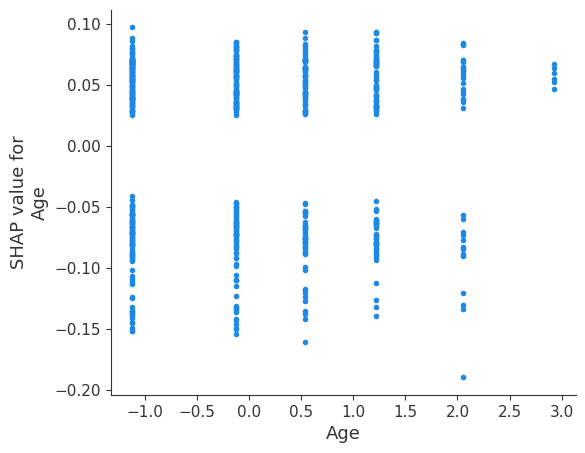

Dependence plot for feature: Gender (Best Model, No Interaction)


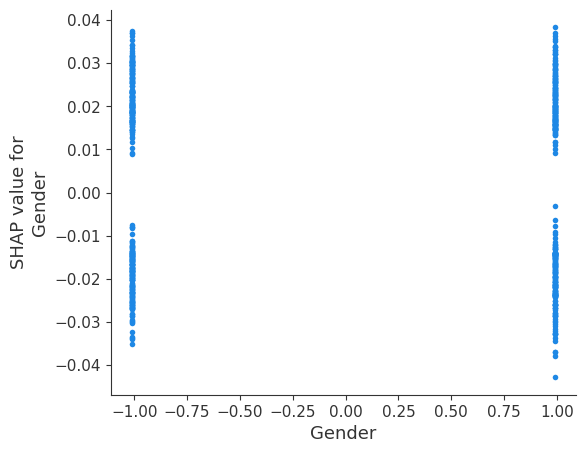

Dependence plot for feature: Education (Best Model, No Interaction)


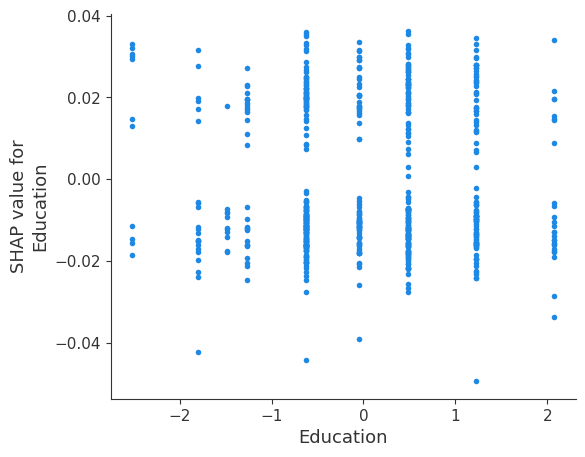

Dependence plot for feature: Country (Best Model, No Interaction)


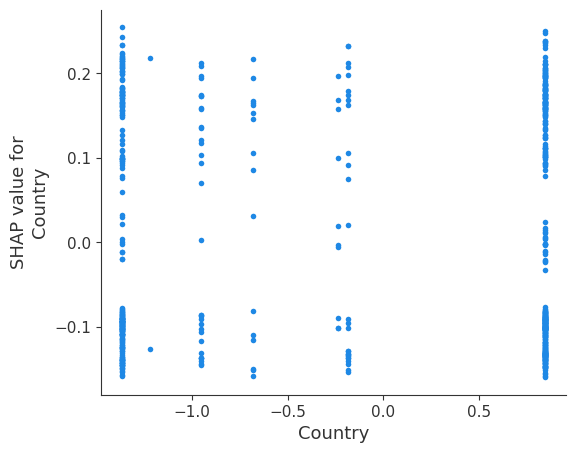

Dependence plot for feature: Ethnicity (Best Model, No Interaction)


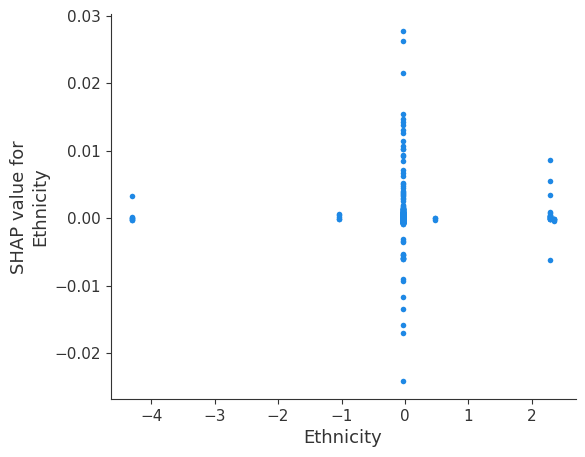

Dependence plot for feature: Nscore (Best Model, No Interaction)


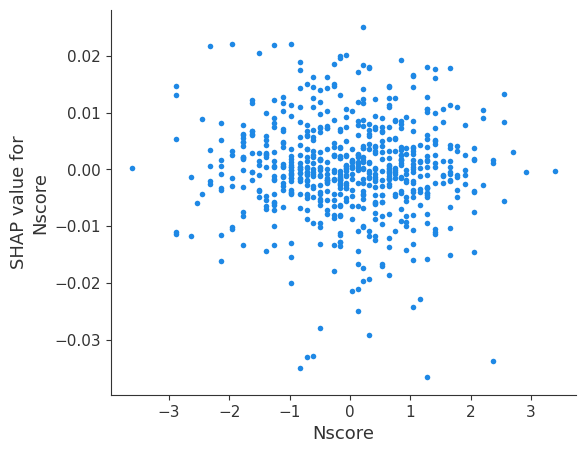

Dependence plot for feature: Escore (Best Model, No Interaction)


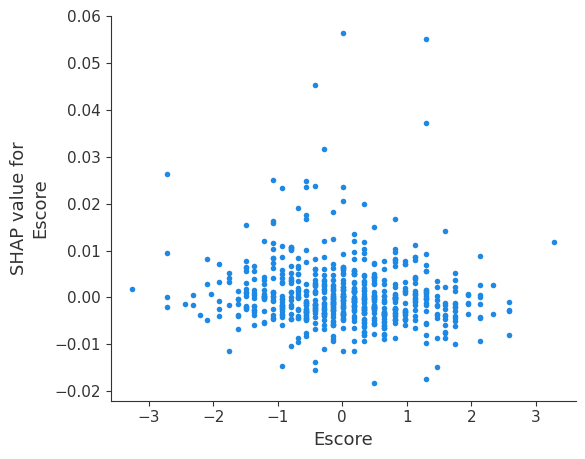

Dependence plot for feature: Oscore (Best Model, No Interaction)


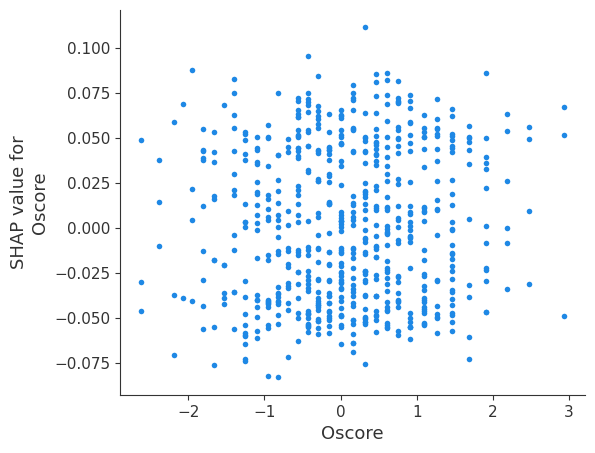

Dependence plot for feature: Ascore (Best Model, No Interaction)


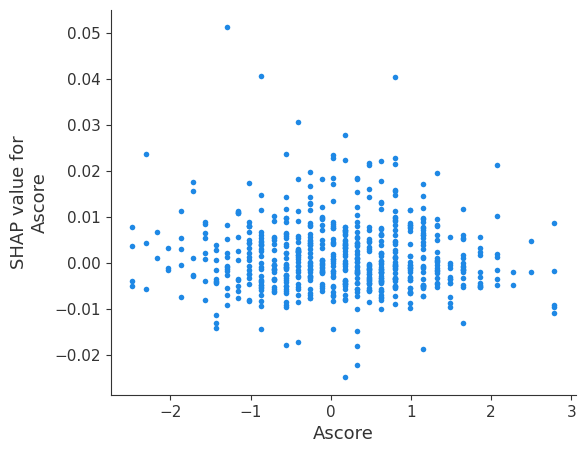

Dependence plot for feature: Cscore (Best Model, No Interaction)


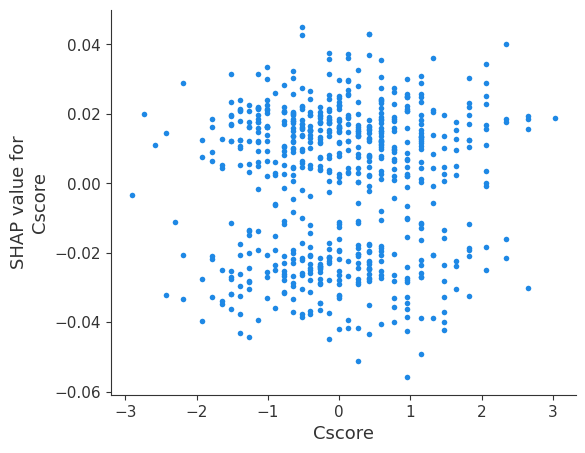

Dependence plot for feature: Impulsive (Best Model, No Interaction)


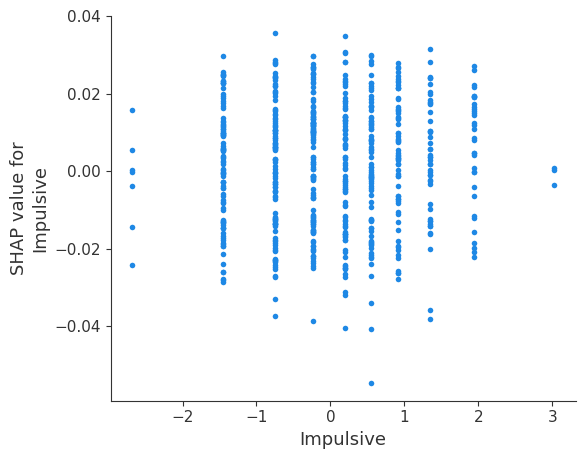

Dependence plot for feature: SS (Best Model, No Interaction)


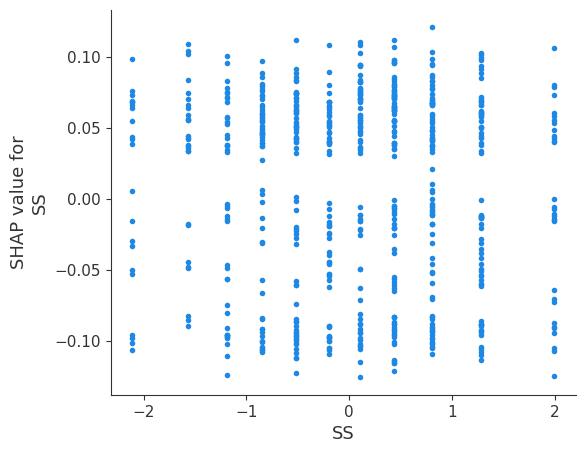

Dependence plot for feature: Age (Worst Model, No Interaction)


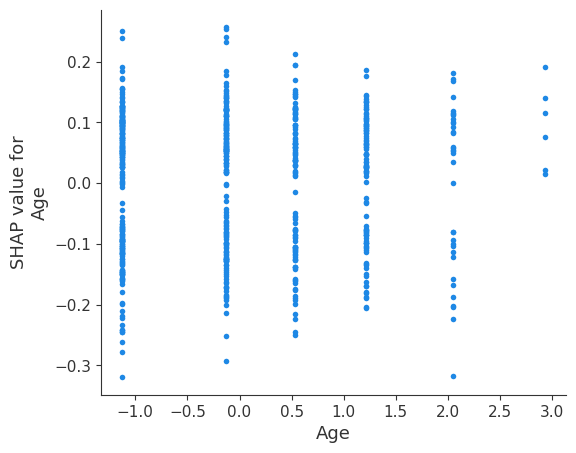

Dependence plot for feature: Gender (Worst Model, No Interaction)


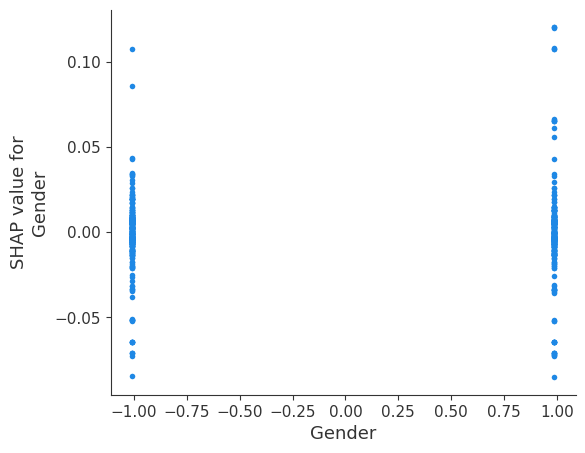

Dependence plot for feature: Education (Worst Model, No Interaction)


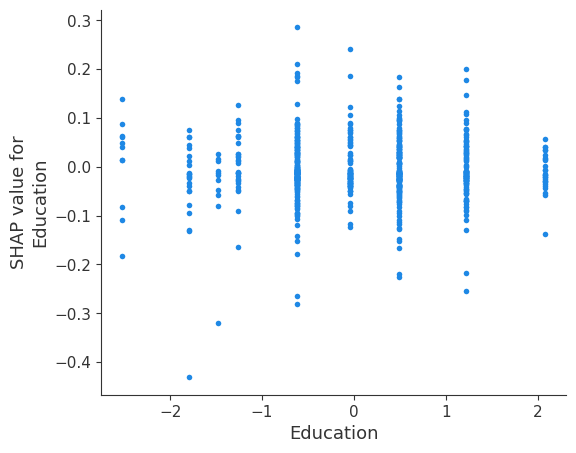

Dependence plot for feature: Country (Worst Model, No Interaction)


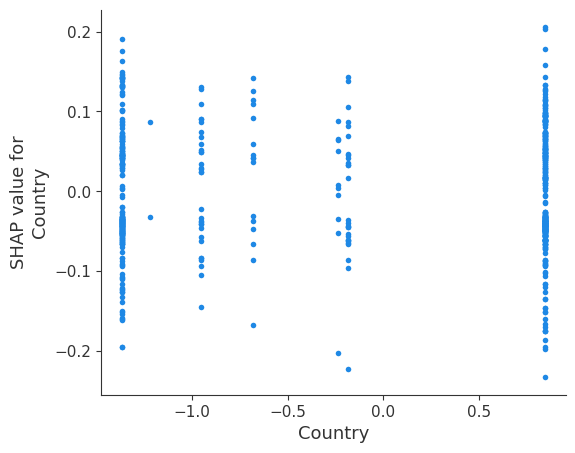

Dependence plot for feature: Ethnicity (Worst Model, No Interaction)


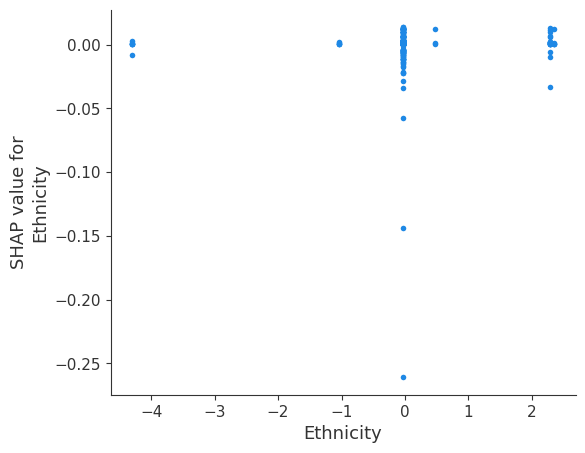

Dependence plot for feature: Nscore (Worst Model, No Interaction)


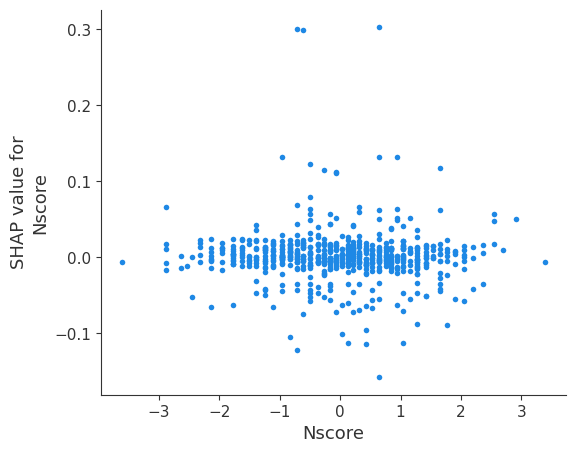

Dependence plot for feature: Escore (Worst Model, No Interaction)


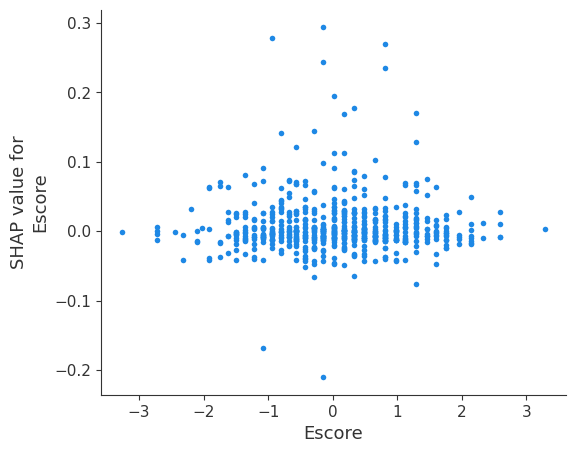

Dependence plot for feature: Oscore (Worst Model, No Interaction)


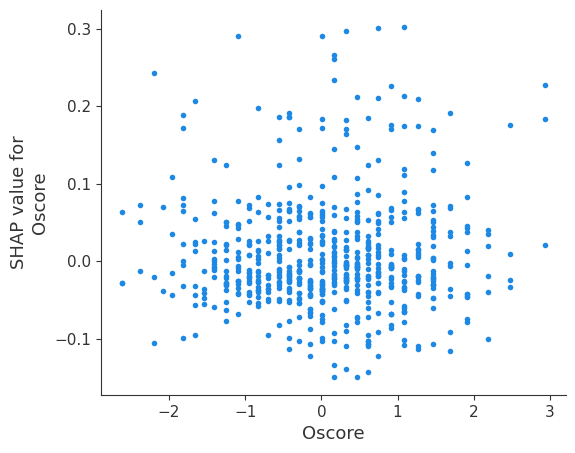

Dependence plot for feature: Ascore (Worst Model, No Interaction)


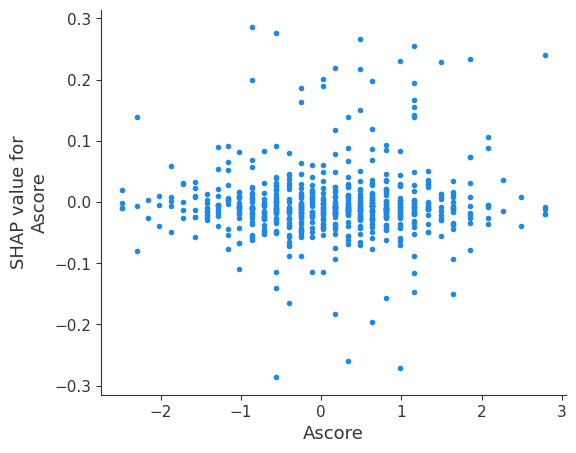

Dependence plot for feature: Cscore (Worst Model, No Interaction)


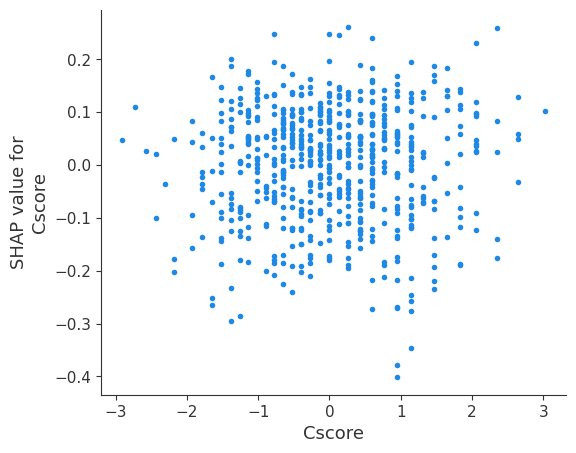

Dependence plot for feature: Impulsive (Worst Model, No Interaction)


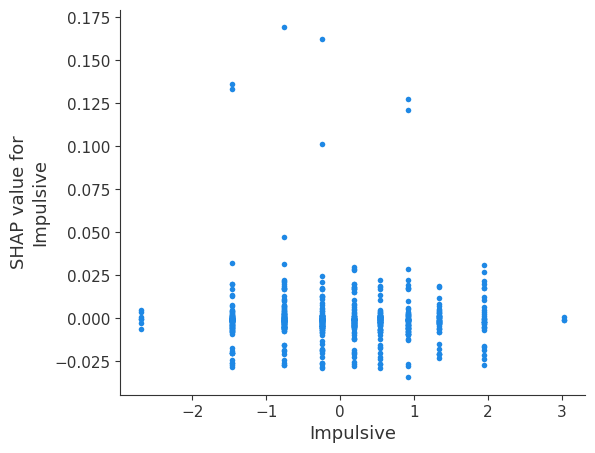

Dependence plot for feature: SS (Worst Model, No Interaction)


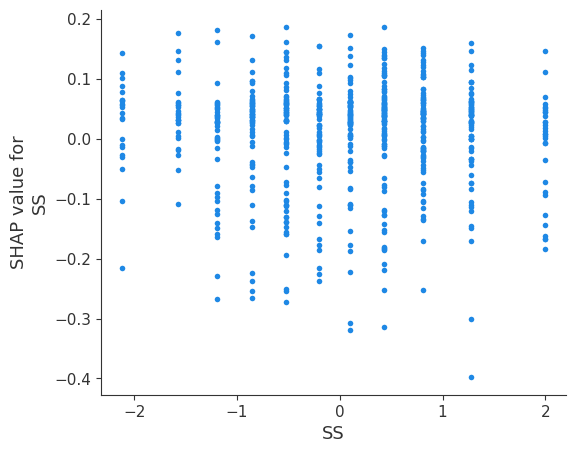

In [17]:
# Dependence plot without interaction for each feature in the best model
for feature in feature_names:
    print(f"Dependence plot for feature: {feature} (Best Model, No Interaction)")
    shap.dependence_plot(feature, shap_values_best_class_1, X_test_df, interaction_index=None)

# Dependence plot without interaction for each feature in the worst model
for feature in feature_names:
    print(f"Dependence plot for feature: {feature} (Worst Model, No Interaction)")
    shap.dependence_plot(feature, shap_values_worst_class_1, X_test_df, interaction_index=None)

